In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir(r'/Users/apple/Desktop')
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df=pd.read_csv('taipei_original.csv')
pd.options.display.max_columns = None

In [3]:
df.rename(columns={'發生年':'year','發生月':'month','發生日':'date','發生時':'hour','發生分':'minute','處理別':'process','區序':'dist','肇事地點':'locate','死亡人數':'dead','受傷人數':'injure_n','當事人序':'order'},inplace=True)
df.rename(columns={'車種':'car','性別':'sex','年齡':'age','受傷程度':'injure','4天候':'weather','7速限':'speed','8道路型態':'road','9事故位置':'spot'},inplace=True)
df.drop('year',axis=1,inplace=True)
df.drop('minute',axis=1,inplace=True)
df.drop('process',axis=1,inplace=True)
df.drop('injure_n',axis=1,inplace=True)
df.drop('order',axis=1,inplace=True)
df['locate_new']=df['locate'].str.split('路',expand=True)[0]
print(df.head())

   month  date  hour   dist                   locate  dead  car  sex   age  \
0      1     2     8  01大同區  大同區重慶北路3段137巷與民族西路182巷口     0  C03    2  37.0   
1      1     2     8  01大同區  大同區重慶北路3段137巷與民族西路182巷口     0  C03    2  59.0   
2      1     9    10  01大同區           大同區重慶北路1段與天水路口     0  H01    4   0.0   
3      1     9    10  01大同區           大同區重慶北路1段與天水路口     0  C03    1  24.0   
4      1    12    10  01大同區          大同區環河北路1段273號對面     0  C03    1  24.0   

   injure  weather  speed  road  spot locate_new  
0     2.0      6.0     30   4.0   1.0     大同區重慶北  
1     2.0      6.0     30   4.0   1.0     大同區重慶北  
2     4.0      8.0      0   4.0   2.0     大同區重慶北  
3     2.0      8.0      0   4.0   2.0     大同區重慶北  
4     2.0      7.0     60  14.0   7.0     大同區環河北  


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52433 entries, 0 to 52432
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month       52433 non-null  int64  
 1   date        52433 non-null  int64  
 2   hour        52433 non-null  int64  
 3   dist        52433 non-null  object 
 4   locate      52433 non-null  object 
 5   dead        52433 non-null  int64  
 6   car         51267 non-null  object 
 7   sex         52433 non-null  int64  
 8   age         52430 non-null  float64
 9   injure      51149 non-null  float64
 10  weather     52429 non-null  float64
 11  speed       52433 non-null  int64  
 12  road        52429 non-null  float64
 13  spot        52429 non-null  float64
 14  locate_new  52433 non-null  object 
dtypes: float64(5), int64(6), object(4)
memory usage: 6.0+ MB


In [4]:
df['month']=df['month'].astype('object')
df['date']=df['date'].astype('object')
df['hour']=df['hour'].astype('object')
df['sex']=df['sex'].astype('object')
df['injure']=df['injure'].astype('object')
df['weather']=df['weather'].astype('object')
df['speed']=df['speed'].astype('object')
df['road']=df['road'].astype('object')
df['spot']=df['spot'].astype('object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52433 entries, 0 to 52432
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month       52433 non-null  object 
 1   date        52433 non-null  object 
 2   hour        52433 non-null  object 
 3   dist        52433 non-null  object 
 4   locate      52433 non-null  object 
 5   dead        52433 non-null  int64  
 6   car         51267 non-null  object 
 7   sex         52433 non-null  object 
 8   age         52430 non-null  float64
 9   injure      51149 non-null  object 
 10  weather     52429 non-null  object 
 11  speed       52433 non-null  object 
 12  road        52429 non-null  object 
 13  spot        52429 non-null  object 
 14  locate_new  52433 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 6.0+ MB


<AxesSubplot:>

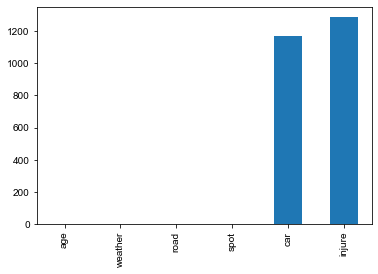

In [6]:
quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
quantitative.remove('dead')
qualitative = [f for f in df.columns if df.dtypes[f] == 'object']
missing=df.isnull().sum()
missing=missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [7]:
for c in qualitative:
    df[c]=df[c].astype('category')
    if df[c].isnull().any():
        df[c]=df[c].cat.add_categories(['0000'])
        df[c]=df[c].fillna('0000')
print(qualitative)

['month', 'date', 'hour', 'dist', 'locate', 'car', 'sex', 'injure', 'weather', 'speed', 'road', 'spot', 'locate_new']


In [8]:
#因同一事故中，不同對象的資料都會被計入，故若僅要計算事故數量需要用此資料集
#car sex age 欄位用df 其他用df2
df2=df.drop_duplicates(subset=['dead','locate'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15465 entries, 0 to 52431
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   month       15465 non-null  category
 1   date        15465 non-null  category
 2   hour        15465 non-null  category
 3   dist        15465 non-null  category
 4   locate      15465 non-null  category
 5   dead        15465 non-null  int64   
 6   car         15465 non-null  category
 7   sex         15465 non-null  category
 8   age         15465 non-null  float64 
 9   injure      15465 non-null  category
 10  weather     15465 non-null  category
 11  speed       15465 non-null  category
 12  road        15465 non-null  category
 13  spot        15465 non-null  category
 14  locate_new  15465 non-null  category
dtypes: category(13), float64(1), int64(1)
memory usage: 1.5 MB


In [9]:
#各欄位之事故數和死亡率分析開始
#1
m_num=df2[['month']].value_counts().reset_index()
m_num.rename(columns={0:'num'},inplace=True)
print(m_num)

   month   num
0      1  1670
1      5  1347
2      3  1347
3     12  1308
4      4  1307
5      7  1303
6     11  1275
7      6  1206
8     10  1193
9      8  1189
10     9  1170
11     2  1150


In [10]:
m_dead=df2.groupby('month')[['dead']].agg(np.sum).reset_index()
m_dead.rename(columns={'dead':'d_num'},inplace=True)
print(m_dead)

   month  d_num
0      1     12
1      2      7
2      3      5
3      4     10
4      5      5
5      6      6
6      7      9
7      8      5
8      9      5
9     10      6
10    11      8
11    12      4


In [11]:
m_all=m_num.merge(m_dead, on='month')
m_all['d_rate_percent']=(m_all['d_num']/m_all['num'])*100
m_all=m_all.sort_values(by='month')
print(m_all)

   month   num  d_num  d_rate_percent
0      1  1670     12        0.718563
11     2  1150      7        0.608696
2      3  1347      5        0.371195
4      4  1307     10        0.765111
1      5  1347      5        0.371195
7      6  1206      6        0.497512
5      7  1303      9        0.690714
9      8  1189      5        0.420521
10     9  1170      5        0.427350
8     10  1193      6        0.502934
6     11  1275      8        0.627451
3     12  1308      4        0.305810


Text(0, 0.5, 'dead_rate_percent')

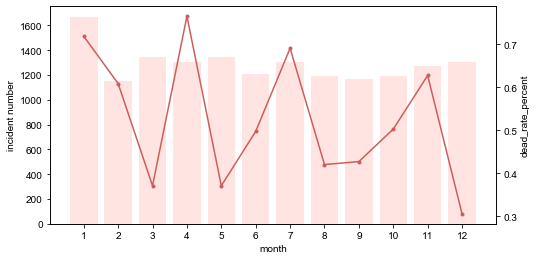

In [12]:
fig, ax1 = plt.subplots()
fig.set_size_inches([8,4])
ax2 = ax1.twinx()
ax1.bar(m_all['month'],m_all['num'],color='mistyrose')
ax2.plot(m_all['month'],m_all['d_rate_percent'],'.-',color='indianred')
ax1.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax1.set_xlabel('month')
ax1.set_ylabel('incident number')
ax2.set_ylabel('dead_rate_percent')

In [13]:
#2
d_num=df2[['date']].value_counts().reset_index()
d_num.rename(columns={0:'num'},inplace=True)
print(d_num)

   date  num
0    26  581
1    25  560
2    12  555
3    13  549
4    22  540
5    18  531
6    23  530
7    19  526
8    20  525
9    16  519
10   11  517
11   17  511
12   27  506
13    2  505
14   10  503
15    1  503
16   21  502
17   15  501
18    7  497
19    3  490
20    4  481
21   14  479
22    8  475
23   28  473
24   30  469
25   24  469
26    5  469
27    6  461
28    9  452
29   29  439
30   31  347


In [14]:
d_dead=df2.groupby('date')[['dead']].agg(np.sum).reset_index()
d_dead.rename(columns={'dead':'d_num'},inplace=True)
print(d_dead)

   date  d_num
0     1      5
1     2      1
2     3      3
3     4      1
4     5      0
5     6      1
6     7      4
7     8      3
8     9      5
9    10      3
10   11      1
11   12      4
12   13      4
13   14      5
14   15      2
15   16      0
16   17      3
17   18      3
18   19      2
19   20      3
20   21      2
21   22      4
22   23      1
23   24      2
24   25      3
25   26      6
26   27      3
27   28      3
28   29      1
29   30      2
30   31      2


In [15]:
d_all=d_num.merge(d_dead, on='date')
d_all['d_rate_percent']=(d_all['d_num']/d_all['num'])*100
d_all=d_all.sort_values(by='date')
print(d_all)

   date  num  d_num  d_rate_percent
15    1  503      5        0.994036
13    2  505      1        0.198020
19    3  490      3        0.612245
20    4  481      1        0.207900
26    5  469      0        0.000000
27    6  461      1        0.216920
18    7  497      4        0.804829
22    8  475      3        0.631579
28    9  452      5        1.106195
14   10  503      3        0.596421
10   11  517      1        0.193424
2    12  555      4        0.720721
3    13  549      4        0.728597
21   14  479      5        1.043841
17   15  501      2        0.399202
9    16  519      0        0.000000
11   17  511      3        0.587084
5    18  531      3        0.564972
7    19  526      2        0.380228
8    20  525      3        0.571429
16   21  502      2        0.398406
4    22  540      4        0.740741
6    23  530      1        0.188679
25   24  469      2        0.426439
1    25  560      3        0.535714
0    26  581      6        1.032702
12   27  506      3        0

Text(0, 0.5, 'dead_rate_percent')

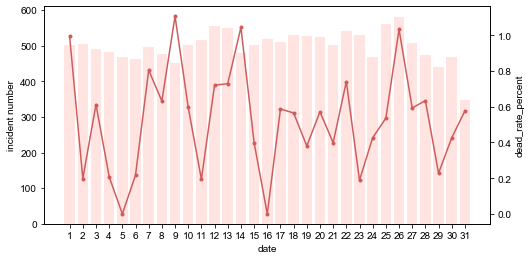

In [16]:
fig, ax1 = plt.subplots()
fig.set_size_inches([8,4])
ax2 = ax1.twinx()
ax1.bar(d_all['date'],d_all['num'],color='mistyrose')
ax2.plot(d_all['date'],d_all['d_rate_percent'],'.-',color='indianred')
ax1.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31])
ax1.set_xlabel('date')
ax1.set_ylabel('incident number')
ax2.set_ylabel('dead_rate_percent')

In [17]:
#3
h_num=df2[['hour']].value_counts().reset_index()
h_num.rename(columns={0:'num'},inplace=True)
print(h_num)

   hour   num
0     8  1362
1     9  1091
2    18  1085
3    17  1061
4    10   948
5    11   929
6    12   909
7    16   907
8    19   834
9    14   828
10   13   823
11    7   822
12   15   819
13   22   598
14   21   592
15   20   573
16   23   368
17    6   276
18    0   190
19    1   119
20    5   110
21    2    85
22    3    75
23    4    61


In [18]:
h_dead=df2.groupby('hour')[['dead']].agg(np.sum).reset_index()
h_dead.rename(columns={'dead':'d_num'},inplace=True)
print(h_dead)

   hour  d_num
0     0      3
1     1      3
2     2      1
3     3      2
4     4      1
5     5      4
6     6      7
7     7      6
8     8      4
9     9      4
10   10      3
11   11      3
12   12      2
13   13      2
14   14      4
15   15      5
16   16      2
17   17      2
18   18      8
19   19      7
20   20      3
21   21      4
22   22      0
23   23      2


In [19]:
h_all=h_num.merge(h_dead, on='hour')
h_all['d_rate_percent']=(h_all['d_num']/h_all['num'])*100
h_all=h_all.sort_values(by='hour')
print(h_all)

   hour   num  d_num  d_rate_percent
18    0   190      3        1.578947
19    1   119      3        2.521008
21    2    85      1        1.176471
22    3    75      2        2.666667
23    4    61      1        1.639344
20    5   110      4        3.636364
17    6   276      7        2.536232
11    7   822      6        0.729927
0     8  1362      4        0.293686
1     9  1091      4        0.366636
4    10   948      3        0.316456
5    11   929      3        0.322928
6    12   909      2        0.220022
10   13   823      2        0.243013
9    14   828      4        0.483092
12   15   819      5        0.610501
7    16   907      2        0.220507
3    17  1061      2        0.188501
2    18  1085      8        0.737327
8    19   834      7        0.839329
15   20   573      3        0.523560
14   21   592      4        0.675676
13   22   598      0        0.000000
16   23   368      2        0.543478


In [20]:
h_all=h_all.sort_values(by='num',ascending=False)
h_all['num_rate']=h_all['num']/np.sum(h_all['num'])
print(h_all)

   hour   num  d_num  d_rate_percent  num_rate
0     8  1362      4        0.293686  0.088070
1     9  1091      4        0.366636  0.070546
2    18  1085      8        0.737327  0.070158
3    17  1061      2        0.188501  0.068607
4    10   948      3        0.316456  0.061300
5    11   929      3        0.322928  0.060071
6    12   909      2        0.220022  0.058778
7    16   907      2        0.220507  0.058649
8    19   834      7        0.839329  0.053928
9    14   828      4        0.483092  0.053540
10   13   823      2        0.243013  0.053217
11    7   822      6        0.729927  0.053152
12   15   819      5        0.610501  0.052958
13   22   598      0        0.000000  0.038668
14   21   592      4        0.675676  0.038280
15   20   573      3        0.523560  0.037051
16   23   368      2        0.543478  0.023796
17    6   276      7        2.536232  0.017847
18    0   190      3        1.578947  0.012286
19    1   119      3        2.521008  0.007695
20    5   110

Text(0, 0.5, 'dead_rate_percent')

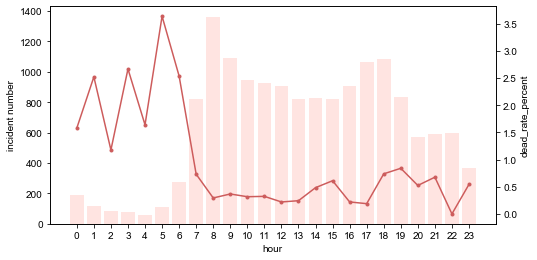

In [21]:
h_all=h_all.sort_values(by='hour',ascending=False)
fig, ax1 = plt.subplots()
fig.set_size_inches([8,4])
ax2 = ax1.twinx()
ax1.bar(h_all['hour'],h_all['num'],color='mistyrose')
ax2.plot(h_all['hour'],h_all['d_rate_percent'],'.-',color='indianred')
ax1.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
ax1.set_xlabel('hour')
ax1.set_ylabel('incident number')
ax2.set_ylabel('dead_rate_percent')

In [22]:
#4
dist_num=df2[['dist']].value_counts().reset_index()
dist_num.rename(columns={0:'num'},inplace=True)
print(dist_num)

     dist   num
0   03中山區  1750
1   09北投區  1625
2   12內湖區  1603
3   10文山區  1545
4   07信義區  1493
5   04大安區  1487
6   08士林區  1298
7   05中正區  1297
8   02萬華區   996
9   06松山區   868
10  01大同區   848
11  11南港區   655


In [23]:
dist_dead=df2.groupby('dist')[['dead']].agg(np.sum).reset_index()
dist_dead.rename(columns={'dead':'d_num'},inplace=True)
print(dist_dead)

     dist  d_num
0   01大同區      6
1   02萬華區      4
2   03中山區     11
3   04大安區     14
4   05中正區      3
5   06松山區      2
6   07信義區      5
7   08士林區     10
8   09北投區     11
9   10文山區      5
10  11南港區      1
11  12內湖區     10


In [24]:
dist_all=dist_num.merge(dist_dead, on='dist')
dist_all['d_rate_percent']=(dist_all['d_num']/dist_all['num'])*100
dist_all=dist_all.sort_values(by='dist')
print(dist_all)

     dist   num  d_num  d_rate_percent
10  01大同區   848      6        0.707547
8   02萬華區   996      4        0.401606
0   03中山區  1750     11        0.628571
5   04大安區  1487     14        0.941493
7   05中正區  1297      3        0.231303
9   06松山區   868      2        0.230415
4   07信義區  1493      5        0.334896
6   08士林區  1298     10        0.770416
1   09北投區  1625     11        0.676923
3   10文山區  1545      5        0.323625
11  11南港區   655      1        0.152672
2   12內湖區  1603     10        0.623830


In [25]:
dist_all=dist_all.sort_values(by='num',ascending=False)
dist_all['num_rate']=dist_all['num']/np.sum(dist_all['num'])
print(dist_all)

     dist   num  d_num  d_rate_percent  num_rate
0   03中山區  1750     11        0.628571  0.113159
1   09北投區  1625     11        0.676923  0.105076
2   12內湖區  1603     10        0.623830  0.103653
3   10文山區  1545      5        0.323625  0.099903
4   07信義區  1493      5        0.334896  0.096541
5   04大安區  1487     14        0.941493  0.096153
6   08士林區  1298     10        0.770416  0.083931
7   05中正區  1297      3        0.231303  0.083867
8   02萬華區   996      4        0.401606  0.064403
9   06松山區   868      2        0.230415  0.056127
10  01大同區   848      6        0.707547  0.054833
11  11南港區   655      1        0.152672  0.042354


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


Text(0, 0.5, 'dead_rate_percent')

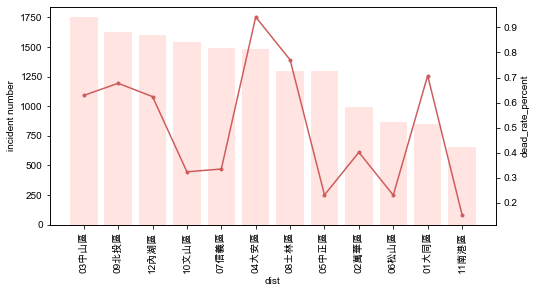

In [26]:
dist_all=dist_all.sort_values(by='num',ascending=False)
fig, ax1 = plt.subplots()
fig.set_size_inches([8,4])
ax2 = ax1.twinx()
ax1.bar(dist_all['dist'],dist_all['num'],color='mistyrose')
ax2.plot(dist_all['dist'],dist_all['d_rate_percent'],'.-',color='indianred')
ax1.set_xticklabels(dist_all['dist'],rotation=90)
ax1.set_xlabel('dist')
ax1.set_ylabel('incident number')
ax2.set_ylabel('dead_rate_percent')

In [27]:
#5 只選擇一年20次以上的路段
lo_num=df2[['locate_new','dist']].value_counts().reset_index()
lo_num.rename(columns={0:'lo_num'},inplace=True)
lo_num=lo_num[lo_num['lo_num']>=20]
print(lo_num)

    locate_new   dist  lo_num
0        文山區木柵  10文山區     251
1        文山區興隆  10文山區     248
2       信義區忠孝東  07信義區     215
3        內湖區內湖  12內湖區     209
4       內湖區民權東  12內湖區     180
5        信義區基隆  07信義區     165
6       中山區中山北  03中山區     158
7       大安區和平東  04大安區     154
8       北投區中央北  09北投區     152
9        松山區八德  06松山區     146
10       北投區承德  09北投區     144
11      文山區羅斯福  10文山區     136
12       內湖區成功  12內湖區     136
13      士林區中山北  08士林區     132
14       文山區木新  10文山區     130
15      松山區南京東  06松山區     125
16       南港區南港  11南港區     125
17      大安區忠孝東  04大安區     124
18       中山區北安  03中山區     119
19      中山區民權東  03中山區     119
20       北投區石牌  09北投區     119
21       文山區辛亥  10文山區     112
22      大安區復興南  04大安區     110
23       中正區汀州  05中正區     110
24       北投區大度  09北投區     106
25      士林區延平北  08士林區     106
26      大同區延平北  01大同區     104
27      南港區忠孝東  11南港區     103
28       大安區基隆  04大安區     102
29       內湖區康寧  12內湖區     101
30      大安區敦化南  04大安區      94
31       大安區信義  04大安區      93
32       信

In [28]:
lo_dead=df2.groupby('locate_new')[['dead']].agg(np.sum).reset_index()
lo_dead.rename(columns={'dead':'lo_d_num'},inplace=True)
print(lo_dead)

                            locate_new  lo_d_num
0                            中山區一江街與松江         0
1                       中山區中原街95號與中原街口         0
2                            中山區中原街與吉林         0
3                           中山區中原街與新生北         0
4                           中山區中原街與民權東         0
5                           中山區中原街與民生東         0
6                          中山區中原街與錦州街口         0
7                            中山區中原街與長春         0
8                               中山區中山北         2
9                          中山區中山橋圓山飯店前         0
10                            中山區中山橋往北         0
11                      中山區中山橋往北新生高架橋下         0
12                         中山區中山橋往北橋頭處         0
13                    中山區中山橋往北機車專用道入口處         0
14                         中山區中山橋往北機車道         0
15                       中山區中山橋機車引道北往南         0
16                           中山區五常街16號         0
17                        中山區五常街53巷19號         0
18                        中山區五常街53巷與龍江         0
19                  

In [29]:
lo_all=lo_num.merge(lo_dead, on='locate_new')
lo_all['lo_d_rate_percent']=(lo_all['lo_d_num']/lo_all['lo_num'])*100
lo_all=lo_all.sort_values(by='locate_new')
lo_all=lo_all.reset_index(drop=True)
print(lo_all)

    locate_new   dist  lo_num  lo_d_num  lo_d_rate_percent
0       中山區中山北  03中山區     158         2           1.265823
1        中山區八德  03中山區      26         1           3.846154
2        中山區北安  03中山區     119         0           0.000000
3       中山區南京東  03中山區      73         0           0.000000
4        中山區吉林  03中山區      43         0           0.000000
5       中山區建國北  03中山區      85         0           0.000000
6       中山區復興北  03中山區      56         1           1.785714
7       中山區新生北  03中山區      84         1           1.190476
8        中山區明水  03中山區      28         0           0.000000
9        中山區松江  03中山區      74         1           1.351351
10      中山區林森北  03中山區      83         0           0.000000
11      中山區民族東  03中山區      60         1           1.666667
12      中山區民權東  03中山區     119         1           0.840336
13      中山區民權西  03中山區      21         0           0.000000
14      中山區民生東  03中山區      61         0           0.000000
15      中山區長安東  03中山區      64         0           0.0000

In [30]:
lo_all=lo_all.sort_values(by='lo_d_rate_percent',ascending=False)
lo_all['lo_num_rate']=lo_all['lo_num']/np.sum(lo_all['lo_num'])
print(lo_all)

    locate_new   dist  lo_num  lo_d_num  lo_d_rate_percent  lo_num_rate
49      內湖區南京東  12內湖區      23         1           4.347826     0.002277
77      北投區竹子湖  09北投區      25         1           4.000000     0.002475
1        中山區八德  03中山區      26         1           3.846154     0.002574
26      中正區忠孝西  05中正區      27         1           3.703704     0.002673
29      中正區林森南  05中正區      31         1           3.225806     0.003069
57       內湖區港墘  12內湖區      31         1           3.225806     0.003069
128      文山區秀明  10文山區      31         1           3.225806     0.003069
79       北投區行義  09北投區      31         1           3.225806     0.003069
106     大同區重慶北  01大同區      69         2           2.898551     0.006830
107     大同區長安西  01大同區      35         1           2.857143     0.003465
121      大安區辛亥  04大安區      71         2           2.816901     0.007028
113      大安區大安  04大安區      37         1           2.702703     0.003663
150      萬華區西園  02萬華區      80         2           2.500000     0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


Text(0, 0.5, 'dead_rate_percent')

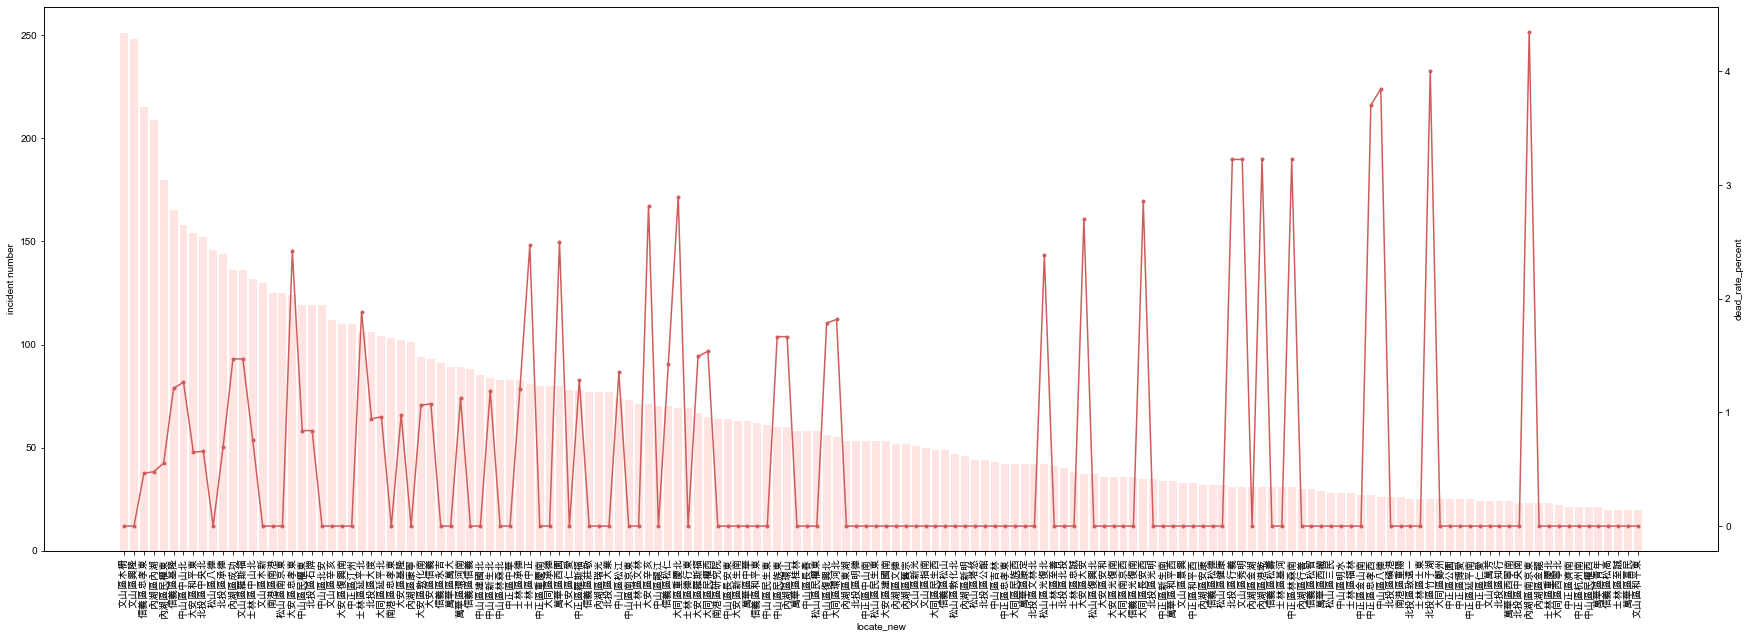

In [34]:
lo_all=lo_all.sort_values(by='lo_num',ascending=False)
fig, ax1 = plt.subplots()
fig.set_size_inches([30,10])
ax2 = ax1.twinx()
ax1.bar(lo_all['locate_new'],lo_all['lo_num'],color='mistyrose')
ax2.plot(lo_all['locate_new'],lo_all['lo_d_rate_percent'],'.-',color='indianred')
ax1.set_xticklabels(lo_all['locate_new'],rotation=90)
ax1.set_xlabel('locate_new')
ax1.set_ylabel('incident number')
ax2.set_ylabel('dead_rate_percent')

In [35]:
#6 
sp_num=df2[['spot']].value_counts().reset_index()
sp_num.rename(columns={0:'num'},inplace=True)
print(sp_num)

    spot   num
0      9  6237
1      1  5200
2      2  2279
3      8   504
4      7   393
5     11   262
6     22   227
7     18    74
8     20    73
9     12    54
10     6    38
11    16    26
12     4    25
13    19    17
14    13    15
15    10    14
16     5    12
17     3     8
18    17     4
19    14     2
20  0000     1


In [36]:
sp_dead=df2.groupby('spot')[['dead']].agg(np.sum).reset_index()
sp_dead.rename(columns={'dead':'d_num'},inplace=True)
print(sp_dead)

    spot  d_num
0      1     27
1      2     16
2      3      0
3      4      0
4      5      0
5      6      0
6      7      3
7      8      0
8      9     33
9     10      1
10    11      0
11    12      0
12    13      1
13    14      0
14    16      0
15    17      0
16    18      0
17    19      0
18    20      0
19    22      1
20  0000      0


In [37]:
sp_all=sp_num.merge(sp_dead, on='spot')
sp_all['d_rate_percent']=(sp_all['d_num']/sp_all['num'])*100
sp_all=sp_all.sort_values(by='spot')
sp_all=sp_all.sort_values(by='num',ascending=False)
sp_all=sp_all.reset_index(drop=True)
sp_all['spot']=sp_all['spot'].astype('str')
print(sp_all)

    spot   num  d_num  d_rate_percent
0    9.0  6237     33        0.529101
1    1.0  5200     27        0.519231
2    2.0  2279     16        0.702062
3    8.0   504      0        0.000000
4    7.0   393      3        0.763359
5   11.0   262      0        0.000000
6   22.0   227      1        0.440529
7   18.0    74      0        0.000000
8   20.0    73      0        0.000000
9   12.0    54      0        0.000000
10   6.0    38      0        0.000000
11  16.0    26      0        0.000000
12   4.0    25      0        0.000000
13  19.0    17      0        0.000000
14  13.0    15      1        6.666667
15  10.0    14      1        7.142857
16   5.0    12      0        0.000000
17   3.0     8      0        0.000000
18  17.0     4      0        0.000000
19  14.0     2      0        0.000000
20  0000     1      0        0.000000


In [38]:
sp_all=sp_all.sort_values(by='num',ascending=False)
sp_all['num_rate']=sp_all['num']/np.sum(sp_all['num'])
print(sp_all)

    spot   num  d_num  d_rate_percent  num_rate
0    9.0  6237     33        0.529101  0.403298
1    1.0  5200     27        0.519231  0.336243
2    2.0  2279     16        0.702062  0.147365
3    8.0   504      0        0.000000  0.032590
4    7.0   393      3        0.763359  0.025412
5   11.0   262      0        0.000000  0.016941
6   22.0   227      1        0.440529  0.014678
7   18.0    74      0        0.000000  0.004785
8   20.0    73      0        0.000000  0.004720
9   12.0    54      0        0.000000  0.003492
10   6.0    38      0        0.000000  0.002457
11  16.0    26      0        0.000000  0.001681
12   4.0    25      0        0.000000  0.001617
13  19.0    17      0        0.000000  0.001099
14  13.0    15      1        6.666667  0.000970
15  10.0    14      1        7.142857  0.000905
16   5.0    12      0        0.000000  0.000776
17   3.0     8      0        0.000000  0.000517
18  17.0     4      0        0.000000  0.000259
19  14.0     2      0        0.000000  0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Text(0, 0.5, 'dead_rate_percent')

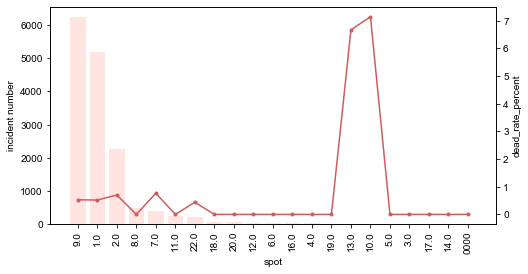

In [39]:
fig, ax1 = plt.subplots()
fig.set_size_inches([8,4])
ax2 = ax1.twinx()
ax1.bar(sp_all['spot'],sp_all['num'],color='mistyrose')
ax2.plot(sp_all['spot'],sp_all['d_rate_percent'],'.-',color='indianred')
ax1.set_xticklabels(sp_all['spot'],rotation=90)
ax1.set_xlabel('spot')
ax1.set_ylabel('incident number')
ax2.set_ylabel('dead_rate_percent')

In [40]:
#7
ro_num=df2[['road']].value_counts().reset_index()
ro_num.rename(columns={0:'num'},inplace=True)
print(ro_num)

    road   num
0     14  6684
1      4  4177
2      3  2975
3     15   460
4      5   360
5     11   302
6      8   178
7     13   136
8     10    84
9     12    30
10    16    29
11     6    25
12     7    14
13     9     9
14  0000     1
15    17     1


In [41]:
ro_dead=df2.groupby('road')[['dead']].agg(np.sum).reset_index()
ro_dead.rename(columns={'dead':'d_num'},inplace=True)
print(ro_dead)

    road  d_num
0      3     10
1      4     28
2      5      5
3      6      0
4      7      1
5      8      0
6      9      0
7     10      3
8     11      9
9     12      0
10    13      3
11    14     20
12    15      2
13    16      1
14    17      0
15  0000      0


In [42]:
ro_all=ro_num.merge(ro_dead, on='road')
ro_all['d_rate_percent']=(ro_all['d_num']/ro_all['num'])*100
ro_all=ro_all.sort_values(by='num',ascending=False)
ro_all=ro_all.reset_index(drop=True)
ro_all['road']=ro_all['road'].astype('str')
print(ro_all)

    road   num  d_num  d_rate_percent
0   14.0  6684     20        0.299222
1    4.0  4177     28        0.670338
2    3.0  2975     10        0.336134
3   15.0   460      2        0.434783
4    5.0   360      5        1.388889
5   11.0   302      9        2.980132
6    8.0   178      0        0.000000
7   13.0   136      3        2.205882
8   10.0    84      3        3.571429
9   12.0    30      0        0.000000
10  16.0    29      1        3.448276
11   6.0    25      0        0.000000
12   7.0    14      1        7.142857
13   9.0     9      0        0.000000
14  0000     1      0        0.000000
15  17.0     1      0        0.000000


Text(0, 0.5, 'dead_rate_percent')

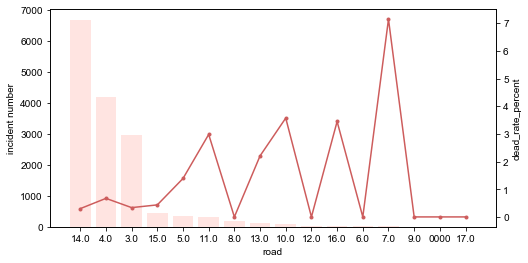

In [43]:
fig, ax1 = plt.subplots()
fig.set_size_inches([8,4])
ax2 = ax1.twinx()
ax1.bar(ro_all['road'],ro_all['num'],color='mistyrose')
ax2.plot(ro_all['road'],ro_all['d_rate_percent'],'.-',color='indianred')
ax1.set_xlabel('road')
ax1.set_ylabel('incident number')
ax2.set_ylabel('dead_rate_percent')

In [44]:
#8
spe_num=df2[['speed']].value_counts().reset_index()
spe_num.rename(columns={0:'num'},inplace=True)
print(spe_num)

   speed   num
0     50  9639
1     40  2865
2     30  2024
3      0   669
4     60   156
5     70    46
6     80    22
7     20    14
8     25    11
9     10     9
10     1     4
11     5     3
12    15     2
13   401     1


In [45]:
spe_dead=df2.groupby('speed')[['dead']].agg(np.sum).reset_index()
spe_dead.rename(columns={'dead':'d_num'},inplace=True)
print(spe_dead)

   speed  d_num
0      0      5
1      1      0
2      5      0
3     10      0
4     15      0
5     20      0
6     25      0
7     30      5
8     40     14
9     50     52
10    60      2
11    70      2
12    80      2
13   401      0


In [46]:
spe_all=spe_num.merge(spe_dead, on='speed')
spe_all['d_rate_percent']=(spe_all['d_num']/spe_all['num'])*100
spe_all=spe_all.sort_values(by='num',ascending=False)
spe_all=spe_all.reset_index(drop=True)
spe_all['speed']=spe_all['speed'].astype('str')
print(spe_all)

   speed   num  d_num  d_rate_percent
0     50  9639     52        0.539475
1     40  2865     14        0.488656
2     30  2024      5        0.247036
3      0   669      5        0.747384
4     60   156      2        1.282051
5     70    46      2        4.347826
6     80    22      2        9.090909
7     20    14      0        0.000000
8     25    11      0        0.000000
9     10     9      0        0.000000
10     1     4      0        0.000000
11     5     3      0        0.000000
12    15     2      0        0.000000
13   401     1      0        0.000000


Text(0, 0.5, 'dead_rate_percent')

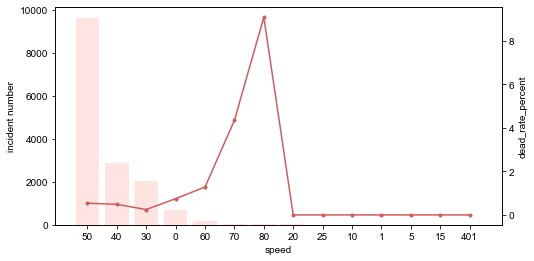

In [47]:
fig, ax1 = plt.subplots()
fig.set_size_inches([8,4])
ax2 = ax1.twinx()
ax1.bar(spe_all['speed'],spe_all['num'],color='mistyrose')
ax2.plot(spe_all['speed'],spe_all['d_rate_percent'],'.-',color='indianred')
ax1.set_xlabel('speed')
ax1.set_ylabel('incident number')
ax2.set_ylabel('dead_rate_percent')

In [48]:
#9
we_num=df2[['weather']].value_counts().reset_index()
we_num.rename(columns={0:'num'},inplace=True)
print(we_num)

  weather    num
0       8  10461
1       7   2497
2       6   2485
3       1     20
4    0000      1
5       2      1


In [49]:
we_dead=df2.groupby('weather')[['dead']].agg(np.sum).reset_index()
we_dead.rename(columns={'dead':'d_num'},inplace=True)
print(we_dead)

  weather  d_num
0       1      0
1       2      0
2       6     10
3       7     14
4       8     58
5    0000      0


In [50]:
we_all=we_num.merge(we_dead, on='weather')
we_all['d_rate_percent']=(we_all['d_num']/we_all['num'])*100
we_all=we_all.sort_values(by='num',ascending=False)
we_all=we_all.reset_index(drop=True)
we_all['weather']=we_all['weather'].astype('str')
print(we_all)

  weather    num  d_num  d_rate_percent
0     8.0  10461     58        0.554440
1     7.0   2497     14        0.560673
2     6.0   2485     10        0.402414
3     1.0     20      0        0.000000
4    0000      1      0        0.000000
5     2.0      1      0        0.000000


Text(0, 0.5, 'dead_rate_percent')

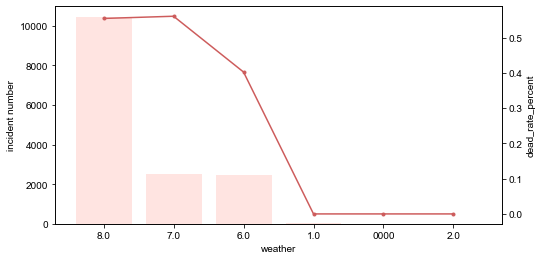

In [51]:
fig, ax1 = plt.subplots()
fig.set_size_inches([8,4])
ax2 = ax1.twinx()
ax1.bar(we_all['weather'],we_all['num'],color='mistyrose')
ax2.plot(we_all['weather'],we_all['d_rate_percent'],'.-',color='indianred')
ax1.set_xlabel('weather')
ax1.set_ylabel('incident number')
ax2.set_ylabel('dead_rate_percent')

In [52]:
#10
sex_num=df[['sex']].value_counts().reset_index()
sex_num.rename(columns={0:'num'},inplace=True)
print(sex_num)

  sex    num
0   1  35041
1   2  15427
2   3   1260
3   4    705


In [53]:
sex_dead=df.groupby('sex')[['dead']].agg(np.sum).reset_index()
sex_dead.rename(columns={'dead':'d_num'},inplace=True)
print(sex_dead)

  sex  d_num
0   1    149
1   2     51
2   3     24
3   4      0


In [54]:
sex_all=sex_num.merge(sex_dead, on='sex')
sex_all['d_rate_percent']=(sex_all['d_num']/sex_all['num'])*100
sex_all=sex_all.sort_values(by='num',ascending=False)
sex_all=sex_all.reset_index(drop=True)
sex_all['sex']=sex_all['sex'].astype('str')
print(sex_all)

  sex    num  d_num  d_rate_percent
0   1  35041    149        0.425216
1   2  15427     51        0.330589
2   3   1260     24        1.904762
3   4    705      0        0.000000


Text(0, 0.5, 'dead_rate_percent')

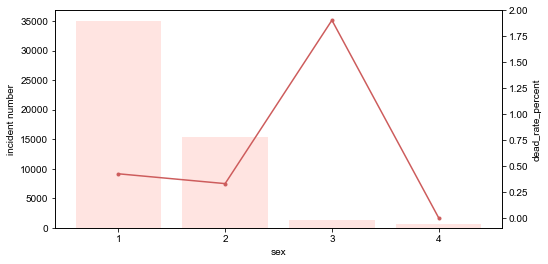

In [55]:
fig, ax1 = plt.subplots()
fig.set_size_inches([8,4])
ax2 = ax1.twinx()
ax1.bar(sex_all['sex'],sex_all['num'],color='mistyrose')
ax2.plot(sex_all['sex'],sex_all['d_rate_percent'],'.-',color='indianred')
ax1.set_xlabel('sex')
ax1.set_ylabel('incident number')
ax2.set_ylabel('dead_rate_percent')

In [56]:
#11 只選超過10場車禍
age_num=df2[['age']].value_counts().reset_index()
age_num.rename(columns={0:'num'},inplace=True)
age_num=age_num[age_num['num']>=10]
print(age_num)

      age  num
0    19.0  452
1    18.0  390
2    24.0  374
3    23.0  372
4    21.0  363
5    20.0  355
6    22.0  341
7    55.0  331
8    25.0  324
9    27.0  322
10    0.0  318
11   26.0  317
12   38.0  310
13   30.0  304
14   36.0  300
15   42.0  297
16   54.0  292
17   53.0  287
18   41.0  287
19   39.0  286
20   59.0  284
21   57.0  280
22   29.0  280
23   28.0  280
24   49.0  278
25   40.0  268
26   44.0  267
27   35.0  267
28   31.0  266
29   37.0  266
30   56.0  266
31   46.0  264
32   60.0  262
33   34.0  258
34   51.0  251
35   33.0  250
36   58.0  249
37   43.0  247
38   32.0  243
39   48.0  240
40   45.0  240
41   52.0  238
42   61.0  238
43   47.0  237
44   62.0  236
45   64.0  236
46   50.0  228
47   63.0  216
48   65.0  204
49   66.0  204
50   67.0  175
51   68.0  169
52   69.0  136
53   70.0   88
54   71.0   76
55   72.0   70
56   17.0   48
57   16.0   47
58   75.0   46
59   73.0   44
60   77.0   42
61   74.0   40
62   76.0   35
63   78.0   31
64   80.0   25
65   15.0 

In [57]:
age_dead=df.groupby('age')[['dead']].agg(np.sum).reset_index()
age_dead.rename(columns={'dead':'d_num'},inplace=True)
print(age_dead)

       age  d_num
0      0.0     25
1      1.0      1
2      2.0      2
3      3.0      0
4      4.0      0
5      5.0      0
6      6.0      1
7      7.0      0
8      8.0      1
9      9.0      0
10    10.0      0
11    11.0      0
12    12.0      0
13    13.0      0
14    14.0      0
15    15.0      0
16    16.0      1
17    17.0      1
18    18.0      3
19    19.0      4
20    20.0      6
21    21.0      2
22    22.0      8
23    23.0      4
24    24.0      3
25    25.0      5
26    26.0      5
27    27.0      2
28    28.0      4
29    29.0      4
30    30.0      2
31    31.0      5
32    32.0      6
33    33.0      2
34    34.0      3
35    35.0      1
36    36.0      3
37    37.0      1
38    38.0      1
39    39.0      3
40    40.0      3
41    41.0      4
42    42.0      6
43    43.0      3
44    44.0      2
45    45.0      0
46    46.0      4
47    47.0      3
48    48.0      1
49    49.0      4
50    50.0      1
51    51.0      2
52    52.0      4
53    53.0      6
54    54.0

In [58]:
age_all=age_num.merge(age_dead, on='age')
age_all['d_rate_percent']=(age_all['d_num']/age_all['num'])*100
age_all=age_all.sort_values(by='num',ascending=False)
age_all=age_all.reset_index(drop=True)
age_all['age']=age_all['age'].astype('str')
print(age_all)

      age  num  d_num  d_rate_percent
0    19.0  452      4        0.884956
1    18.0  390      3        0.769231
2    24.0  374      3        0.802139
3    23.0  372      4        1.075269
4    21.0  363      2        0.550964
5    20.0  355      6        1.690141
6    22.0  341      8        2.346041
7    55.0  331      3        0.906344
8    25.0  324      5        1.543210
9    27.0  322      2        0.621118
10    0.0  318     25        7.861635
11   26.0  317      5        1.577287
12   38.0  310      1        0.322581
13   30.0  304      2        0.657895
14   36.0  300      3        1.000000
15   42.0  297      6        2.020202
16   54.0  292      6        2.054795
17   41.0  287      4        1.393728
18   53.0  287      6        2.090592
19   39.0  286      3        1.048951
20   59.0  284      3        1.056338
21   57.0  280      3        1.071429
22   29.0  280      4        1.428571
23   28.0  280      4        1.428571
24   49.0  278      4        1.438849
25   40.0  2

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


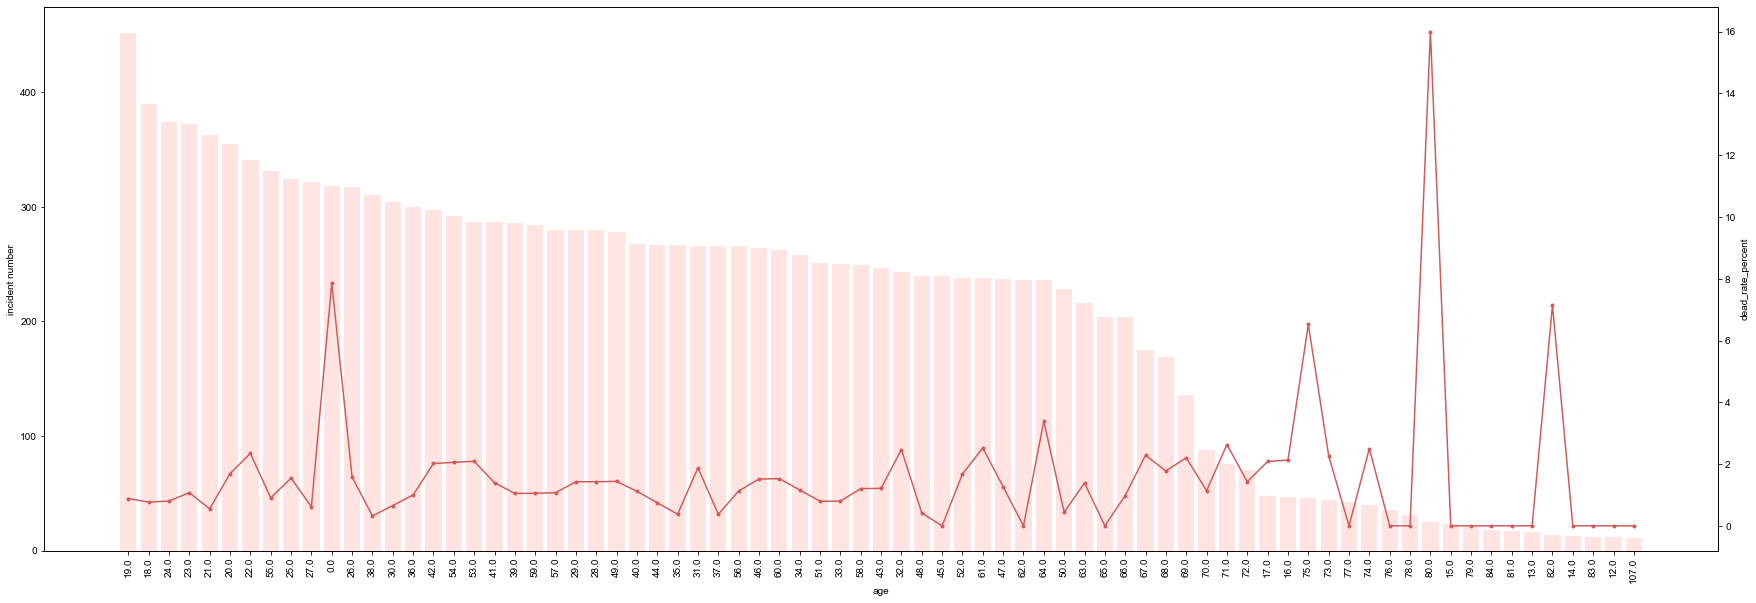

In [59]:
age_all=age_all.sort_values(by='num',ascending=False)
fig, ax1 = plt.subplots()
fig.set_size_inches([30,10])
ax2 = ax1.twinx()
ax1.bar(age_all['age'],age_all['num'],color='mistyrose')
ax2.plot(age_all['age'],age_all['d_rate_percent'],'.-',color='indianred')
ax1.set_xticklabels(age_all['age'],rotation=90)
ax1.set_xlabel('age')
ax1.set_ylabel('incident number')
ax2.set_ylabel('dead_rate_percent')
plt.style.use('ggplot')

In [60]:
#12 只選超過10場車禍
car_num=df[['car']].value_counts().reset_index()
car_num.rename(columns={0:'num'},inplace=True)
print(car_num)

     car    num
0    C03  26181
1    B03   9655
2    H02   3522
3    B01   3107
4    H01   2214
5    B12   1619
6    F01   1242
7   0000   1166
8    B02   1161
9    C04    803
10   A02    428
11   C02    297
12   B11    162
13   A04    127
14   H03    117
15   A12    109
16   C01     96
17   F03     86
18   A05     86
19   A11     38
20   F02     36
21   G06     24
22   E03     22
23   A41     21
24   A01     21
25   C05     18
26   G03     13
27   E01     13
28   F06     11
29   E05      7
30   A03      7
31   G01      6
32   A42      5
33   D03      3
34   A31      3
35   A06      2
36   F04      2
37   A21      1
38   E02      1
39   E04      1


In [61]:
car_dead=df.groupby('car')[['dead']].agg(np.sum).reset_index()
car_dead.rename(columns={'dead':'d_num'},inplace=True)
print(car_dead)

     car  d_num
0    A01      0
1    A02      4
2    A03      0
3    A04      2
4    A05      3
5    A06      0
6    A11      1
7    A12      4
8    A21      0
9    A31      0
10   A41      2
11   A42      0
12   B01      7
13   B02      4
14   B03     35
15   B11      2
16   B12     14
17   C01      3
18   C02      6
19   C03     54
20   C04      0
21   C05      0
22   D03      0
23   E01      0
24   E02      0
25   E03      0
26   E04      0
27   E05      0
28   F01     16
29   F02      0
30   F03      0
31   F04      0
32   F06      0
33   G01      0
34   G03      1
35   G06      0
36   H01     28
37   H02     20
38   H03      1
39  0000     17


In [62]:
car_all=car_num.merge(car_dead, on='car')
car_all['d_rate_percent']=(car_all['d_num']/car_all['num'])*100
car_all=car_all.sort_values(by='num',ascending=False)
car_all=car_all.reset_index(drop=True)
car_all['car']=car_all['car'].astype('str')
print(car_all)

     car    num  d_num  d_rate_percent
0    C03  26181     54        0.206256
1    B03   9655     35        0.362506
2    H02   3522     20        0.567859
3    B01   3107      7        0.225298
4    H01   2214     28        1.264679
5    B12   1619     14        0.864731
6    F01   1242     16        1.288245
7   0000   1166     17        1.457976
8    B02   1161      4        0.344531
9    C04    803      0        0.000000
10   A02    428      4        0.934579
11   C02    297      6        2.020202
12   B11    162      2        1.234568
13   A04    127      2        1.574803
14   H03    117      1        0.854701
15   A12    109      4        3.669725
16   C01     96      3        3.125000
17   F03     86      0        0.000000
18   A05     86      3        3.488372
19   A11     38      1        2.631579
20   F02     36      0        0.000000
21   G06     24      0        0.000000
22   E03     22      0        0.000000
23   A41     21      2        9.523810
24   A01     21      0   

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


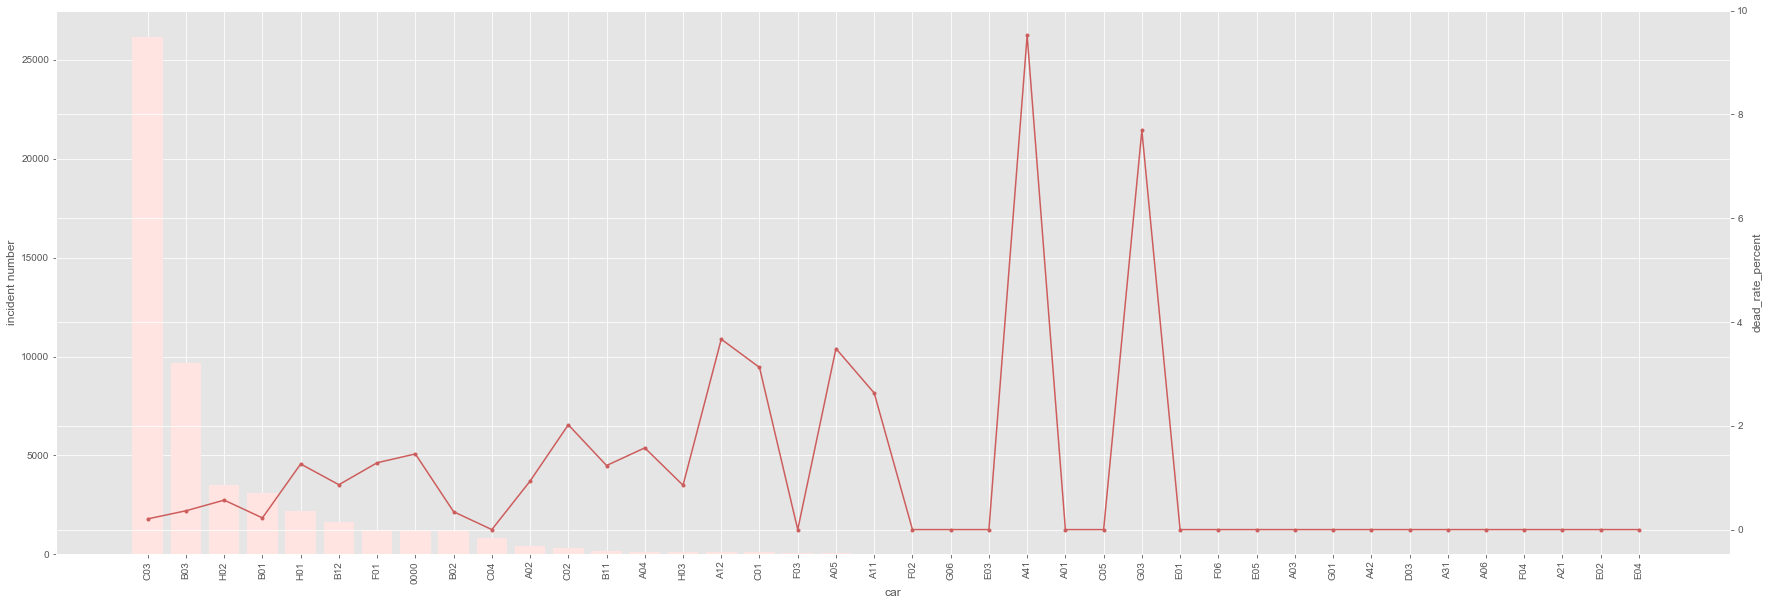

In [63]:
car_all=car_all.sort_values(by='num',ascending=False)
fig, ax1 = plt.subplots()
fig.set_size_inches([30,10])
ax2 = ax1.twinx()
ax1.bar(car_all['car'],car_all['num'],color='mistyrose')
ax2.plot(car_all['car'],car_all['d_rate_percent'],'.-',color='indianred')
ax1.set_xticklabels(car_all['car'],rotation=90)
ax1.set_xlabel('car')
ax1.set_ylabel('incident number')
ax2.set_ylabel('dead_rate_percent')
plt.style.use('ggplot')

In [64]:
#各因子彼此間關係分析開始
#時段拆成凌晨和其他時間
range=[0,7,np.inf]
group=['early','other']
df['time']=pd.cut(df['hour'],bins=range,labels=group)
df2['time']=pd.cut(df2['hour'],bins=range,labels=group)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
#時段拆成尖峰與非尖峰
range=[0,7,9,16,19,np.inf]
group=['norm1','busy1','norm2','busy2','norm3']
df['busy_time']=pd.cut(df['hour'],bins=range,labels=group)
df2['busy_time']=pd.cut(df2['hour'],bins=range,labels=group)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df['time'].fillna('other',inplace=True)
df['busy_time'].fillna('norm1',inplace=True)
df2['time'].fillna('other',inplace=True)
df2['busy_time'].fillna('norm1',inplace=True)

In [146]:
#時段拆更細
range=[0,2,6,9,12,16,19,np.inf]
group=['midnight','early_m','busy1','morning','afternoon','busy2','night']
df['neat_busy_time']=pd.cut(df['hour'],bins=range,labels=group)
df2['neat_busy_time']=pd.cut(df2['hour'],bins=range,labels=group)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [147]:
df['neat_busy_time'].fillna('midnight',inplace=True)
df2['neat_busy_time'].fillna('midnight',inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


<AxesSubplot:xlabel='dist', ylabel='time'>

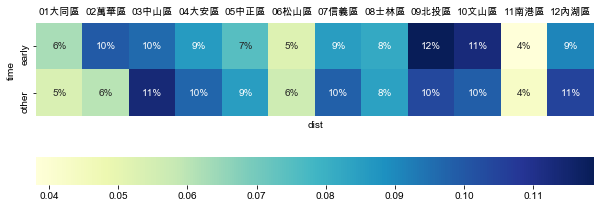

In [63]:
#凌晨時間 vs 其他因子
map1=pd.crosstab(df2['time'],df2['dist'],normalize='index')
plt.figure(figsize=(10, 5))  
plt.tick_params(axis='both', which='major',  labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(map1, annot=True,cmap='YlGnBu',fmt='.00%',square=True,cbar_kws={"orientation": "horizontal"})

<AxesSubplot:xlabel='age', ylabel='time'>

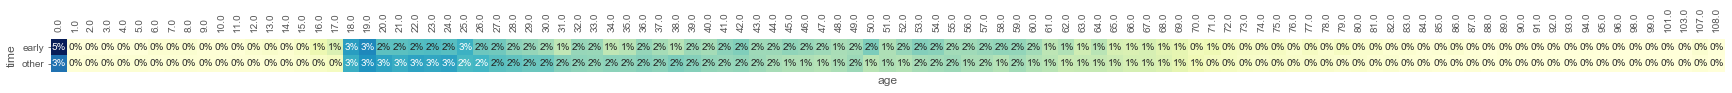

In [83]:
map1=pd.crosstab(df['time'],df['age'],normalize='index') 
plt.figure(figsize=(30,26)) 
plt.tick_params(axis='both', which='major',  labelbottom = False, bottom=False,top=False,labeltop=True)
sns.heatmap(map1, annot=True,cmap='YlGnBu',fmt='.00%',annot_kws={"size":10},cbar=False,square=True)

<AxesSubplot:xlabel='road', ylabel='time'>

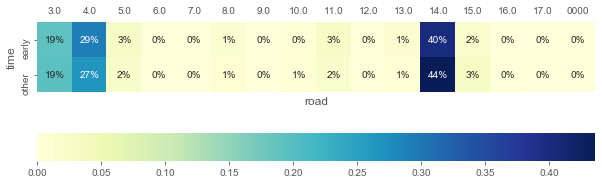

In [84]:
map1=pd.crosstab(df2['time'],df2['road'],normalize='index')
plt.figure(figsize=(10, 5))  
plt.tick_params(axis='both', which='major',  labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(map1, annot=True,cmap='YlGnBu',fmt='.00%',square=True,cbar_kws={"orientation": "horizontal"})

<AxesSubplot:xlabel='dist', ylabel='busy_time'>

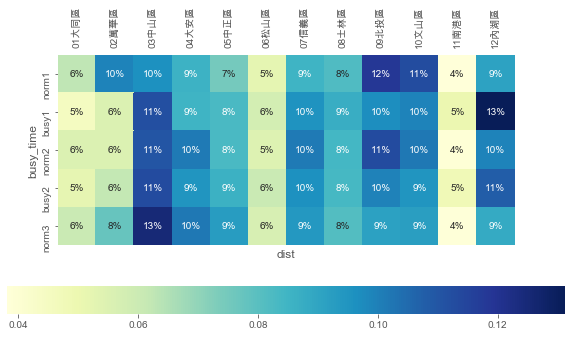

In [85]:
#尖峰時間 vs 其他因子
map1=pd.crosstab(df2['busy_time'],df2['dist'],normalize='index')
plt.figure(figsize=(10,5))  
plt.tick_params(axis='both', which='major',  labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(map1, annot=True,cmap='YlGnBu',fmt='.00%',square=True,cbar_kws={"orientation": "horizontal"})

<AxesSubplot:xlabel='dist', ylabel='neat_busy_time'>

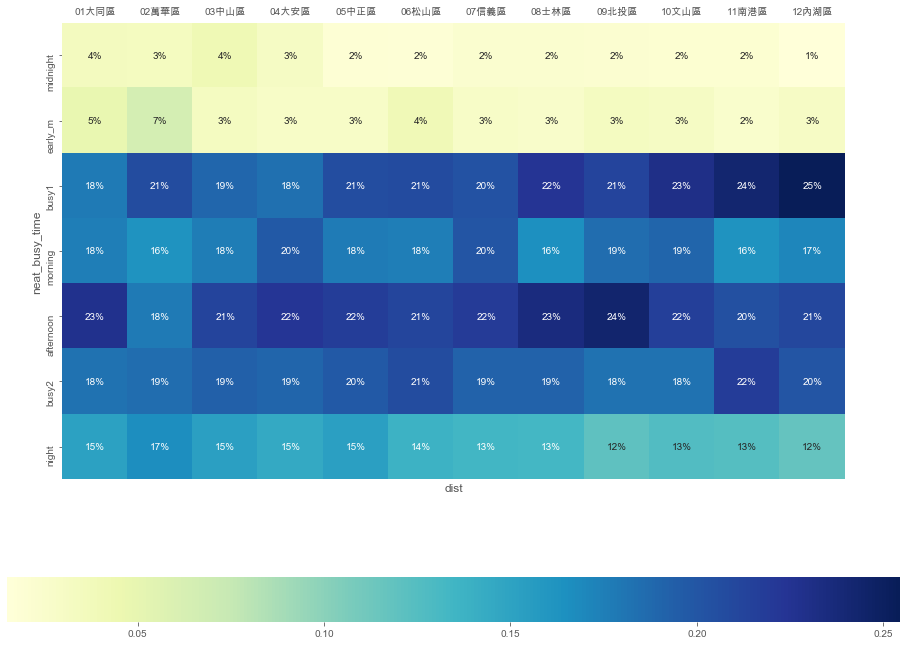

In [221]:
map1=pd.crosstab(df2['neat_busy_time'],df2['dist'],normalize='columns')
plt.figure(figsize=(16,12))  
plt.tick_params(axis='both', which='major',  labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(map1, annot=True,cmap='YlGnBu',fmt='.00%',square=True,cbar_kws={"orientation": "horizontal"})

<AxesSubplot:xlabel='age_type', ylabel='neat_busy_time'>

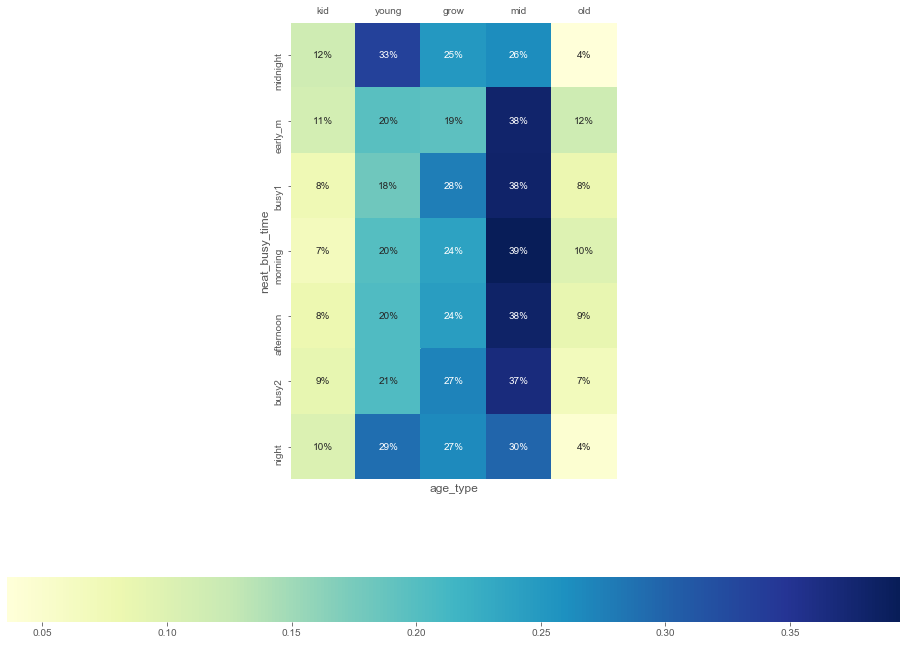

In [154]:
map1=pd.crosstab(df['neat_busy_time'],df['age_type'],normalize='index')
plt.figure(figsize=(16,12))  
plt.tick_params(axis='both', which='major',  labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(map1, annot=True,cmap='YlGnBu',fmt='.00%',square=True,cbar_kws={"orientation": "horizontal"})

<AxesSubplot:xlabel='age_type', ylabel='neat_busy_time'>

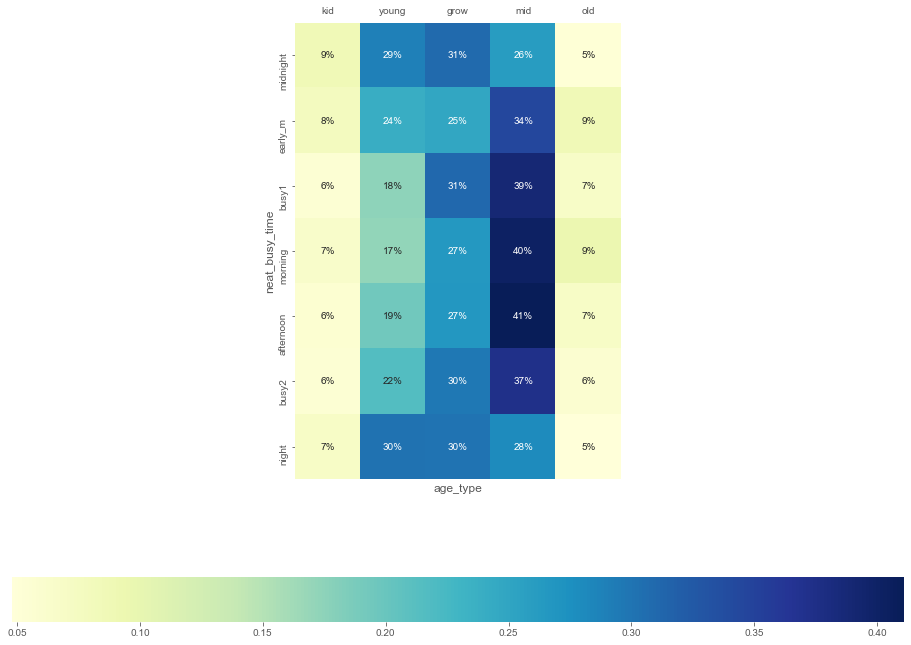

In [155]:
map1=pd.crosstab(df[df['dist']=='03中山區']['neat_busy_time'],df[df['dist']=='03中山區']['age_type'],normalize='index')
plt.figure(figsize=(16,12))  
plt.tick_params(axis='both', which='major',  labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(map1, annot=True,cmap='YlGnBu',fmt='.00%',square=True,cbar_kws={"orientation": "horizontal"})

<AxesSubplot:xlabel='car', ylabel='neat_busy_time'>

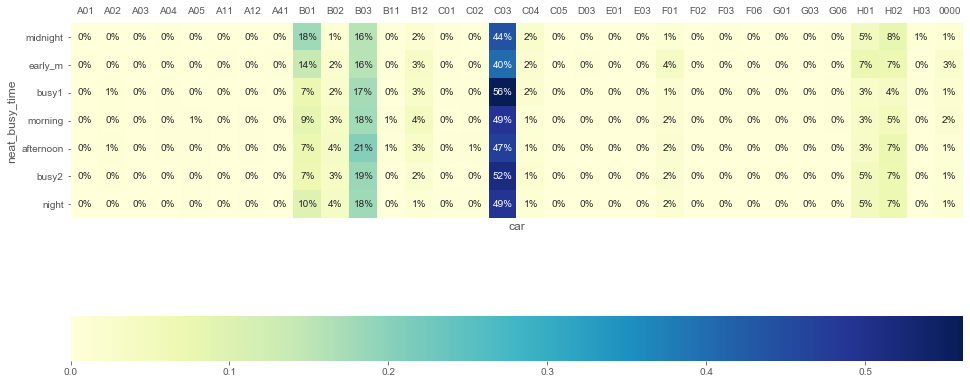

In [156]:
map1=pd.crosstab(df[df['dist']=='03中山區']['neat_busy_time'],df[df['dist']=='03中山區']['car'],normalize='index')
plt.figure(figsize=(16,12))  
plt.tick_params(axis='both', which='major',  labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(map1, annot=True,cmap='YlGnBu',fmt='.00%',square=True,cbar_kws={"orientation": "horizontal"})

<AxesSubplot:xlabel='age', ylabel='dist'>

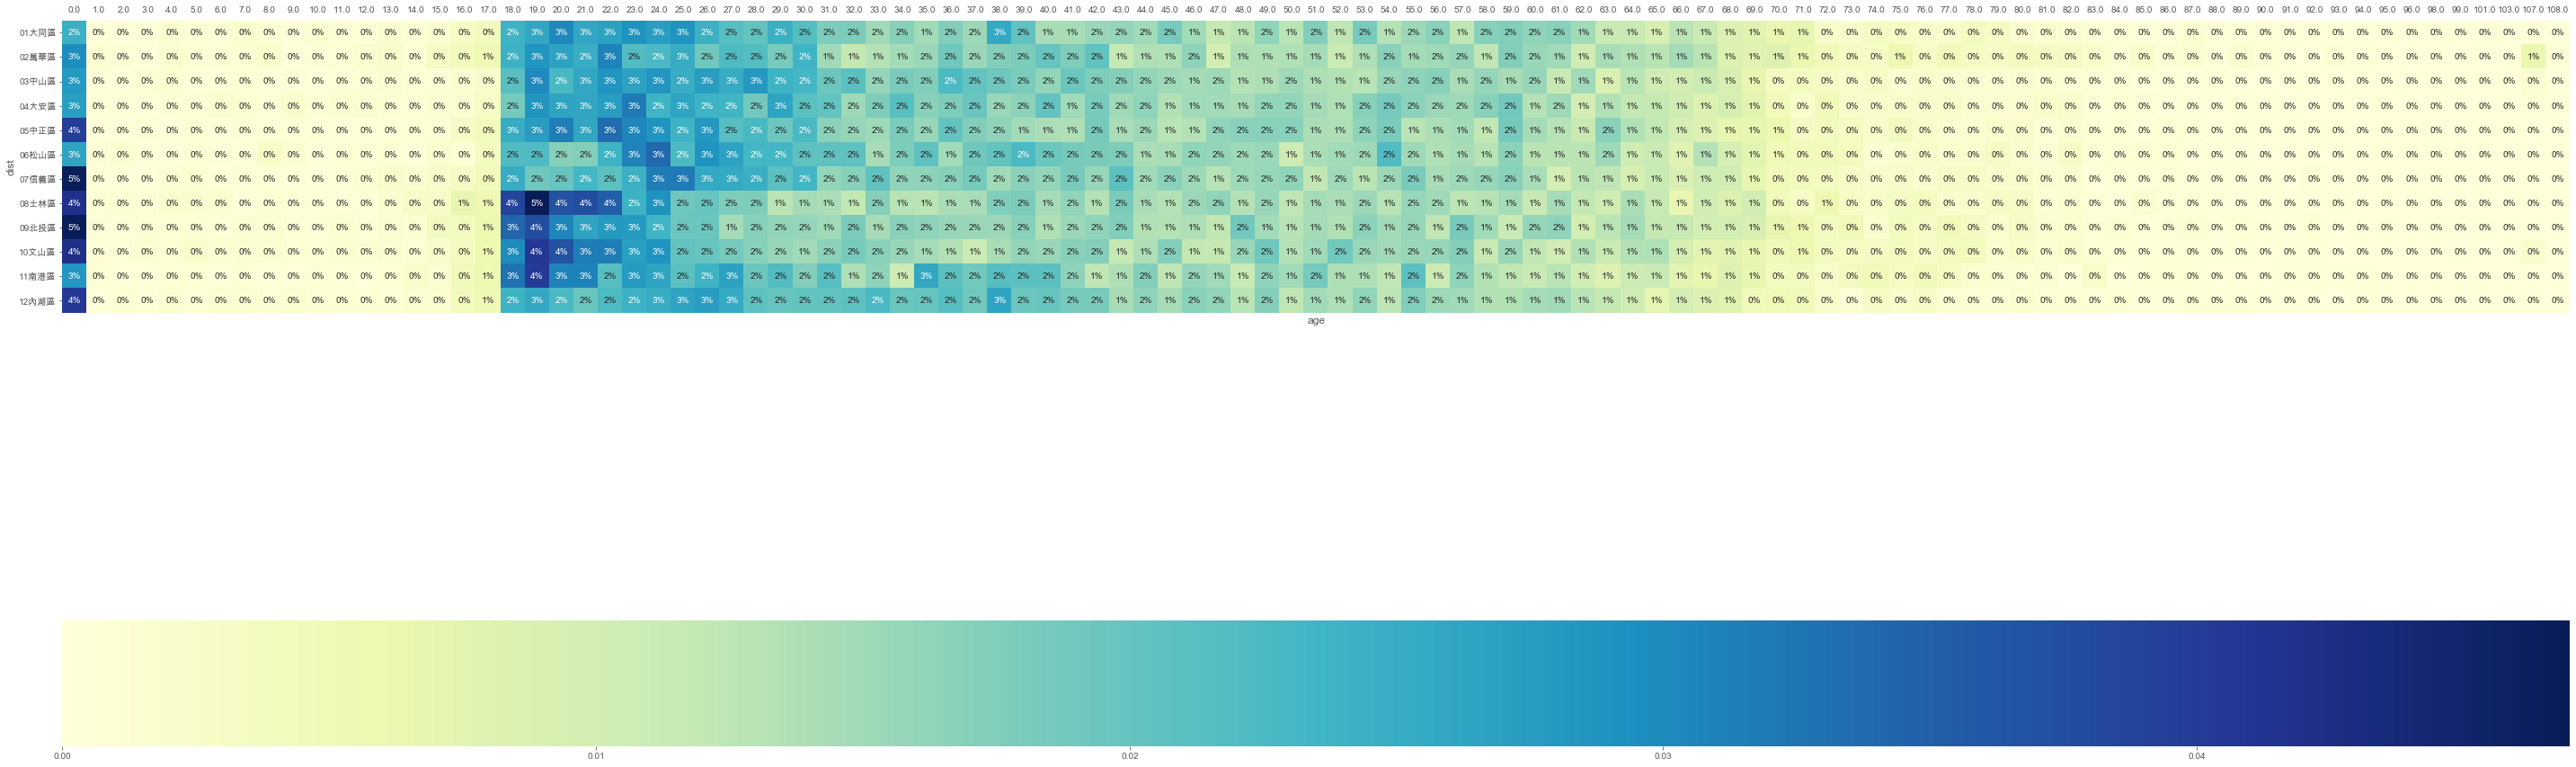

In [86]:
#區域 vs 其他因子
map1=pd.crosstab(df['dist'],df['age'],normalize='index')
plt.figure(figsize=(50,42))  
plt.tick_params(axis='both', which='major',  labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(map1, annot=True,cmap='YlGnBu',fmt='.00%',square=True,cbar_kws={"orientation": "horizontal"})

<AxesSubplot:xlabel='hour', ylabel='dist'>

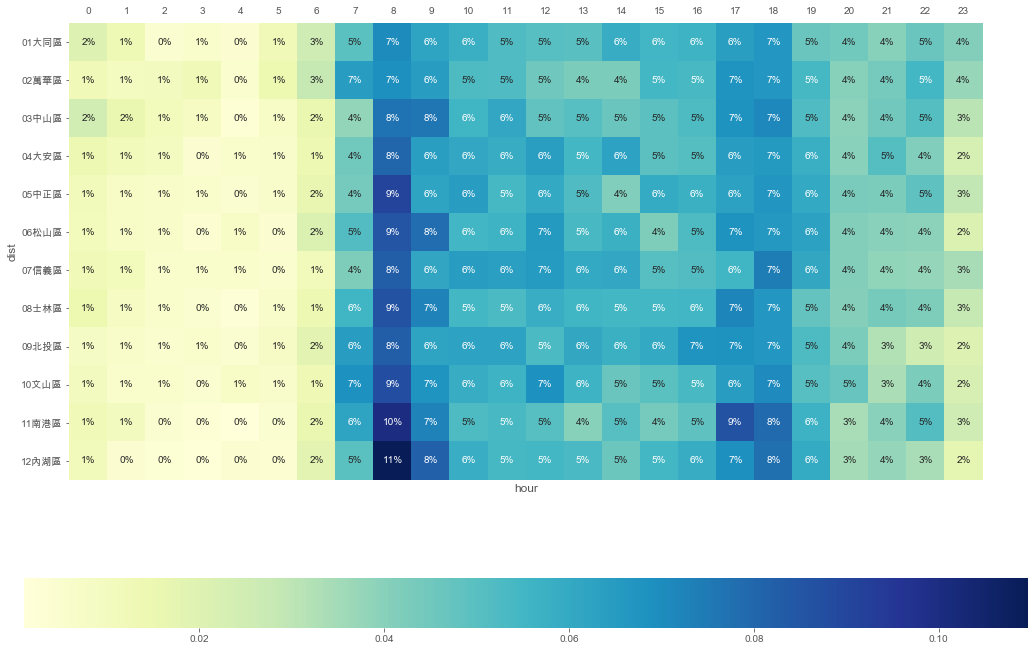

In [92]:
map1=pd.crosstab(df['dist'],df['hour'],normalize='index')
plt.figure(figsize=(18,12))  
plt.tick_params(axis='both', which='major',  labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(map1, annot=True,cmap='YlGnBu',fmt='.00%',annot_kws={"size":10},square=True,cbar_kws={"orientation": "horizontal"})

<AxesSubplot:xlabel='road', ylabel='dist'>

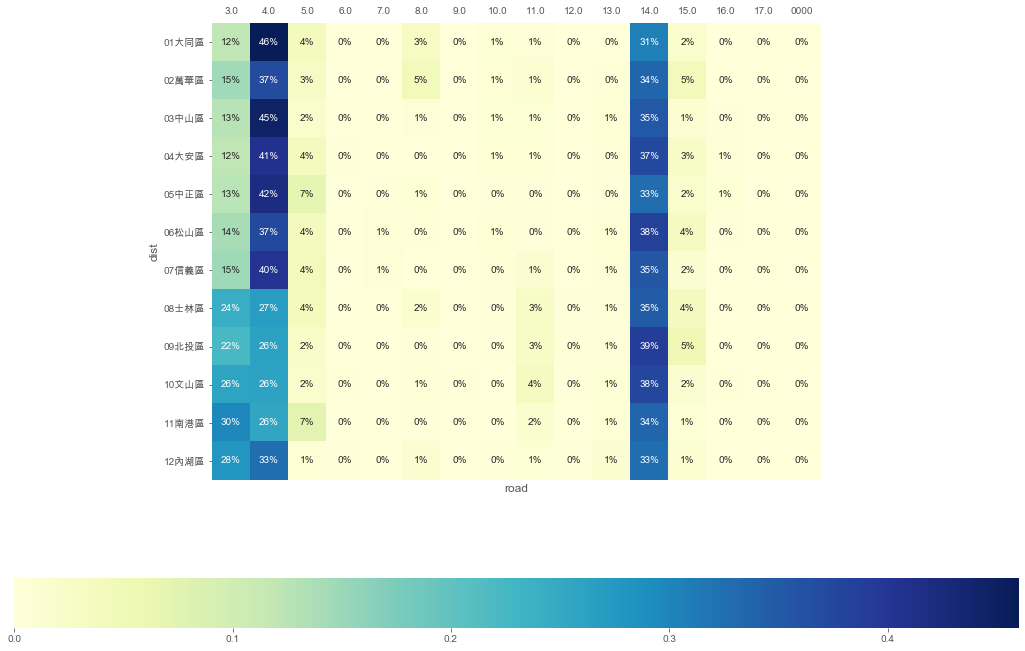

In [153]:
map1=pd.crosstab(df['dist'],df['road'],normalize='index')
plt.figure(figsize=(18,12))  
plt.tick_params(axis='both', which='major',  labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(map1, annot=True,cmap='YlGnBu',fmt='.00%',annot_kws={"size":10},square=True,cbar_kws={"orientation": "horizontal"})

<AxesSubplot:xlabel='car', ylabel='dist'>

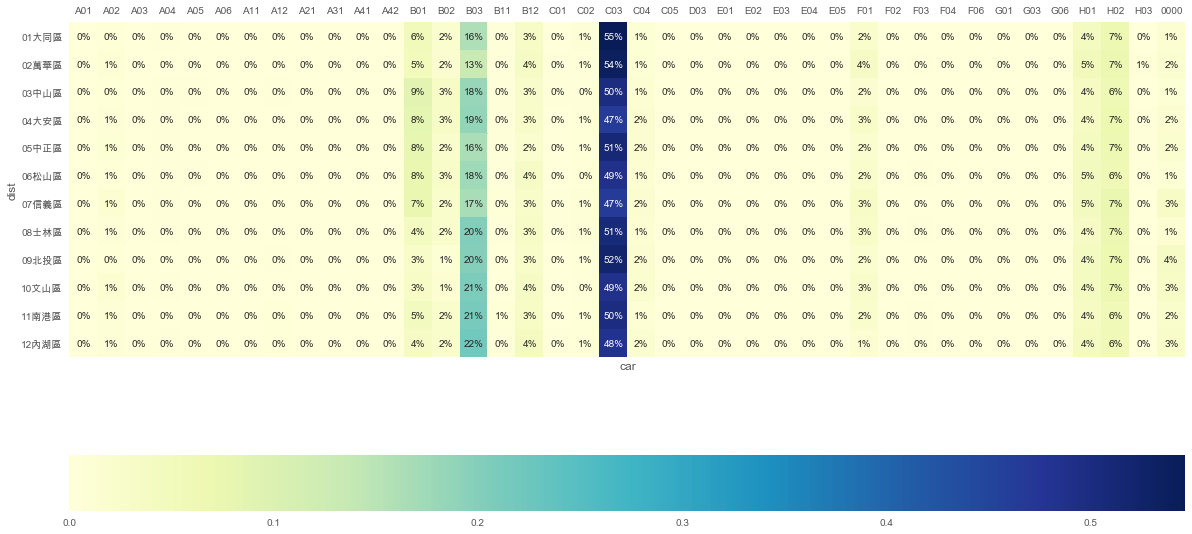

In [206]:
map1=pd.crosstab(df['dist'],df['car'],normalize='index')
plt.figure(figsize=(20,12))  
plt.tick_params(axis='both', which='major',  labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(map1, annot=True,cmap='YlGnBu',fmt='.00%',square=True,cbar_kws={"orientation": "horizontal"})

In [95]:
#部分路段 vs 其他因子
#標出事故數或死亡率高的路段
df['locate_new']=df['locate_new'].astype('str')
df2['locate_new']=df2['locate_new'].astype('str')

searchfor = ['文山區木柵','文山區興隆','信義區忠孝東','內湖區內湖','內湖區民權東','信義區基隆','中山區中山北','大安區和平東','北投區中央北','內湖區成功','文山區羅斯福','大安區忠孝東','士林區延平北']
dist_loca=df[df['locate_new'].str.contains('|'.join(searchfor))]
dist_loca2=df2[df2['locate_new'].str.contains('|'.join(searchfor))]
dist_loca.loc[:,'lo_type']='d'
dist_loca2.loc[:,'lo_type']='d'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [96]:
dist_loca2.head()

,month,date,hour,dist,locate,dead,car,sex,age,injure,weather,speed,road,spot,locate_new,time,busy_time,lo_type
6711,3,12,8,03中山區,中山區中山北路2段與民權東路1段口,0,C03,1,28.0,3,8,50,4,1,中山區中山北,other,busy1,d
6729,2,12,15,03中山區,中山區中山北路2段155號,0,C03,1,27.0,2,8,50,14,8,中山區中山北,other,norm2,d
6731,1,18,0,03中山區,中山區中山北路2段44巷與中山北路2段口,0,B03,1,67.0,3,8,50,4,2,中山區中山北,NaN,NaN,d
6754,1,10,19,03中山區,中山區中山北路2段26巷與中山北路2段口,0,B01,1,47.0,3,8,50,3,2,中山區中山北,other,busy2,d
6760,3,9,13,03中山區,中山區中山北路1段105巷與天津街口,0,B03,1,28.0,3,6,40,4,1,中山區中山北,other,norm2,d


In [97]:
df_loca=df.merge(dist_loca,on='locate_new',how='left',left_index=True, right_index=True, suffixes=('', '_y'))
df_loca.drop(df_loca.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
df_loca2=df2.merge(dist_loca2,on='locate_new',how='left',left_index=True, right_index=True, suffixes=('', '_y'))
df_loca2.drop(df_loca2.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

In [98]:
df_loca['lo_type'].fillna('s',inplace=True)
df_loca2['lo_type'].fillna('s',inplace=True)

In [99]:
df_loca2['lo_type'].value_counts()

s    13225
d     2240
Name: lo_type, dtype: int64

In [100]:
df_loca['lo_type'].value_counts()

s    44522
d     7911
Name: lo_type, dtype: int64

<AxesSubplot:xlabel='spot', ylabel='lo_type'>

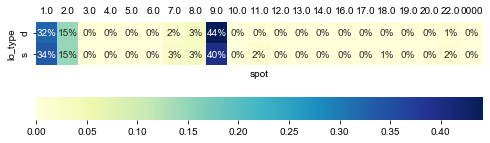

In [55]:
map1=pd.crosstab(df_loca2['lo_type'],df_loca2['spot'],normalize='index')
plt.figure(figsize=(8,4))  
plt.tick_params(axis='both', which='major',  labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(map1, annot=True,cmap='YlGnBu',fmt='.00%',square=True,cbar_kws={"orientation": "horizontal"})

<AxesSubplot:xlabel='road', ylabel='lo_type'>

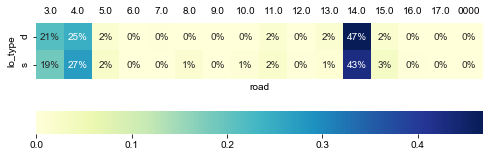

In [56]:
map1=pd.crosstab(df_loca2['lo_type'],df_loca2['road'],normalize='index')
plt.figure(figsize=(8,4))  
plt.tick_params(axis='both', which='major',  labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(map1, annot=True,cmap='YlGnBu',fmt='.00%',square=True,cbar_kws={"orientation": "horizontal"})

<AxesSubplot:xlabel='car', ylabel='spot'>

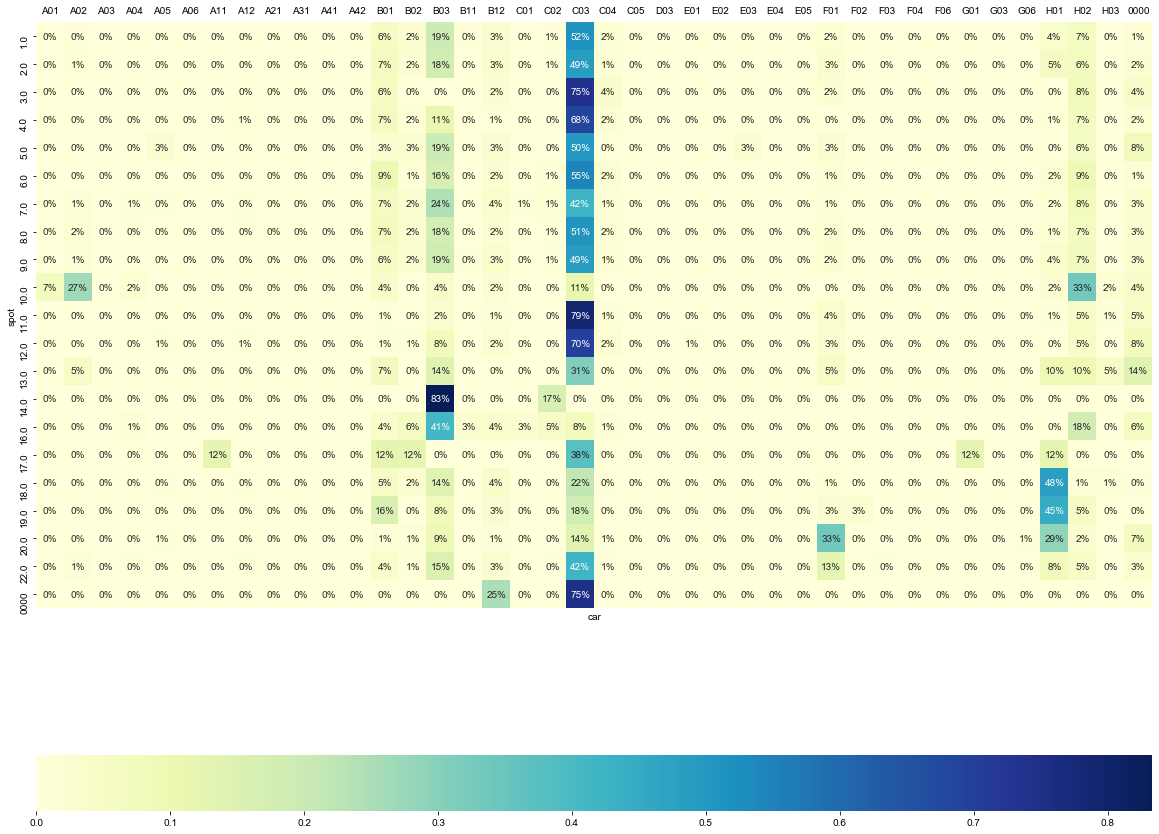

In [73]:
#位置 vs 其他因子
map1=pd.crosstab(df['spot'],df['car'],normalize='index')
plt.figure(figsize=(20,18))  
plt.tick_params(axis='both', which='major',  labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(map1, annot=True,cmap='YlGnBu',fmt='.00%',square=True,cbar_kws={"orientation": "horizontal"})

<AxesSubplot:xlabel='hour', ylabel='spot'>

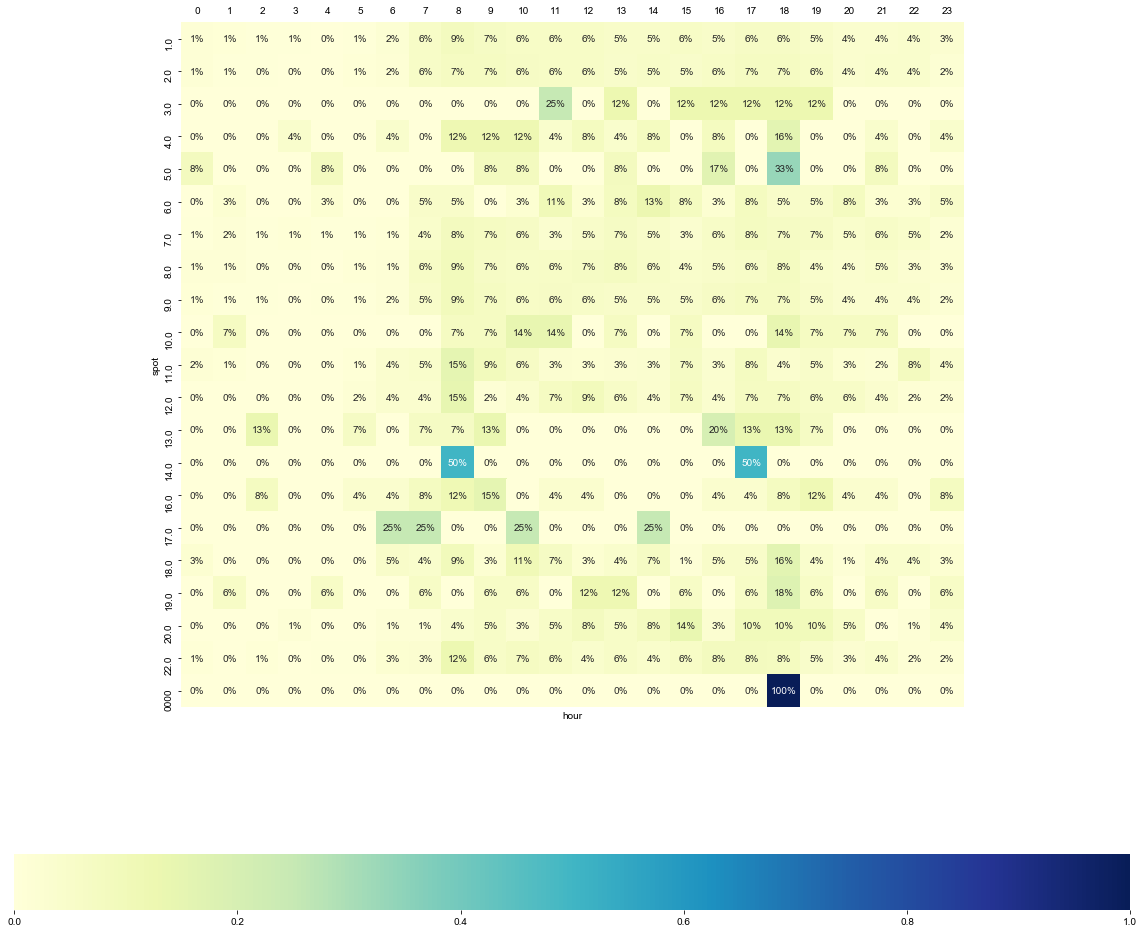

In [92]:
map1=pd.crosstab(df2['spot'],df2['hour'],normalize='index')
plt.figure(figsize=(20,18))  
plt.tick_params(axis='both', which='major',  labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(map1, annot=True,cmap='YlGnBu',fmt='.00%',square=True,cbar_kws={"orientation": "horizontal"})

<AxesSubplot:xlabel='age', ylabel='road'>

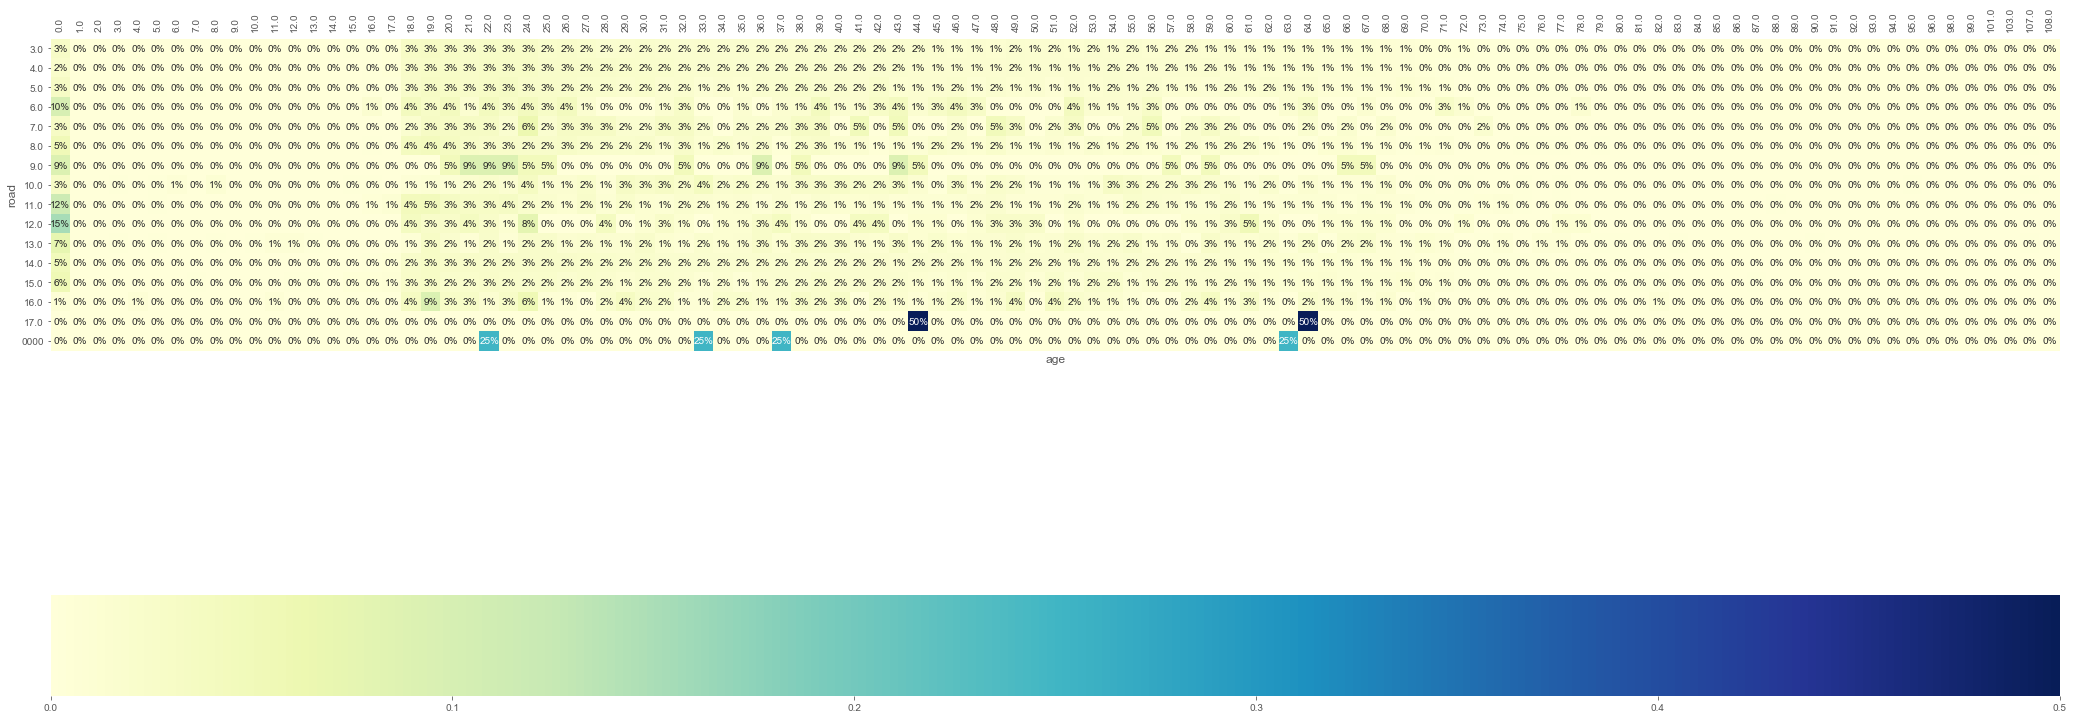

In [103]:
#道路種類 vs 其他因子
map1=pd.crosstab(df['road'],df['age'],normalize='index')
plt.figure(figsize=(36,30))  
plt.tick_params(axis='both', which='major',  labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(map1, annot=True,cmap='YlGnBu',fmt='.00%',square=True,cbar_kws={"orientation": "horizontal"})

<AxesSubplot:xlabel='car', ylabel='road'>

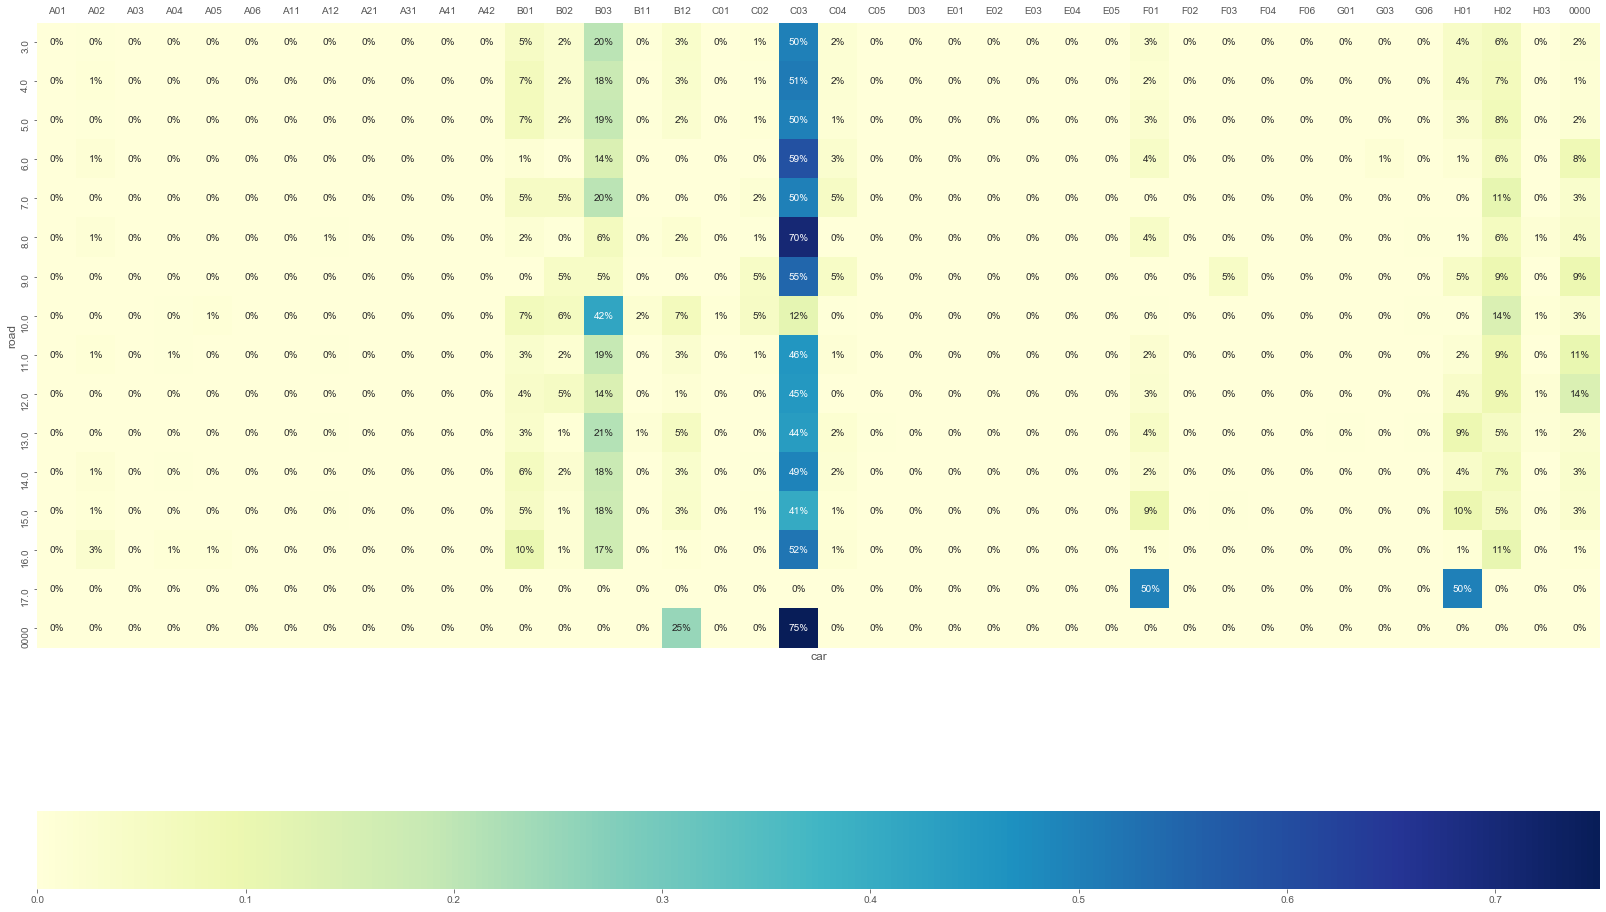

In [101]:
map1=pd.crosstab(df['road'],df['car'],normalize='index')
plt.figure(figsize=(28,20))  
plt.tick_params(axis='both', which='major',  labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(map1, annot=True,cmap='YlGnBu',fmt='.00%',square=True,cbar_kws={"orientation": "horizontal"})

<AxesSubplot:xlabel='spot', ylabel='speed'>

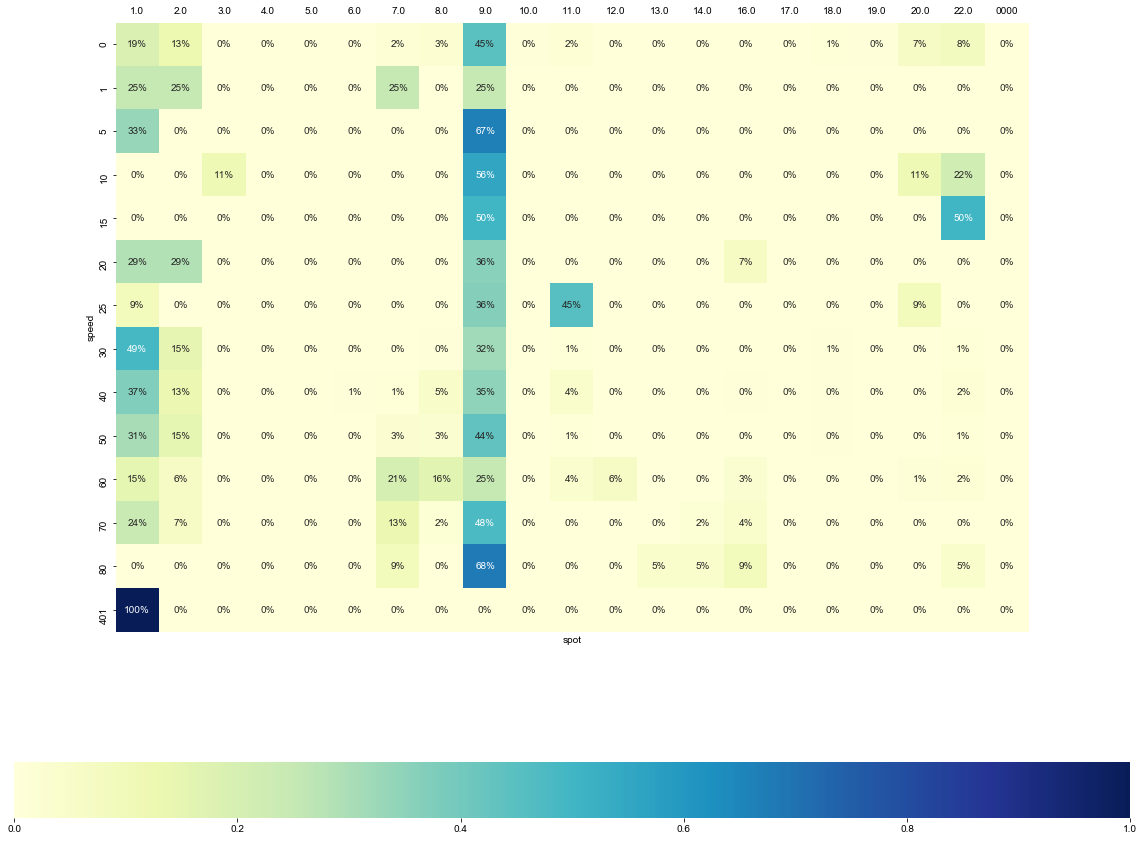

In [79]:
#速限 vs 其他因子
map1=pd.crosstab(df2['speed'],df2['spot'],normalize='index')
plt.figure(figsize=(20,16))  
plt.tick_params(axis='both', which='major',  labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(map1, annot=True,cmap='YlGnBu',fmt='.00%',square=True,cbar_kws={"orientation": "horizontal"})

<AxesSubplot:xlabel='road', ylabel='speed'>

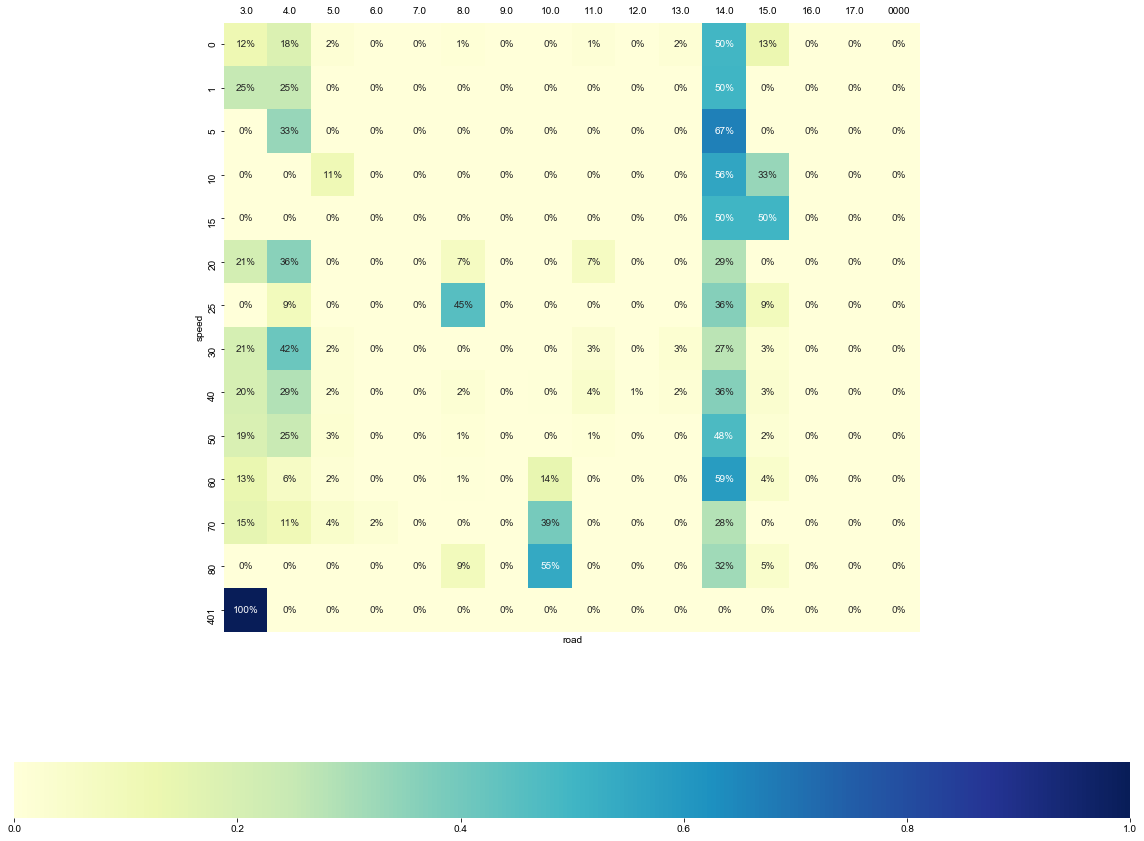

In [80]:
map1=pd.crosstab(df2['speed'],df2['road'],normalize='index')
plt.figure(figsize=(20,16))  
plt.tick_params(axis='both', which='major',  labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(map1, annot=True,cmap='YlGnBu',fmt='.00%',square=True,cbar_kws={"orientation": "horizontal"})

<AxesSubplot:xlabel='car', ylabel='sex'>

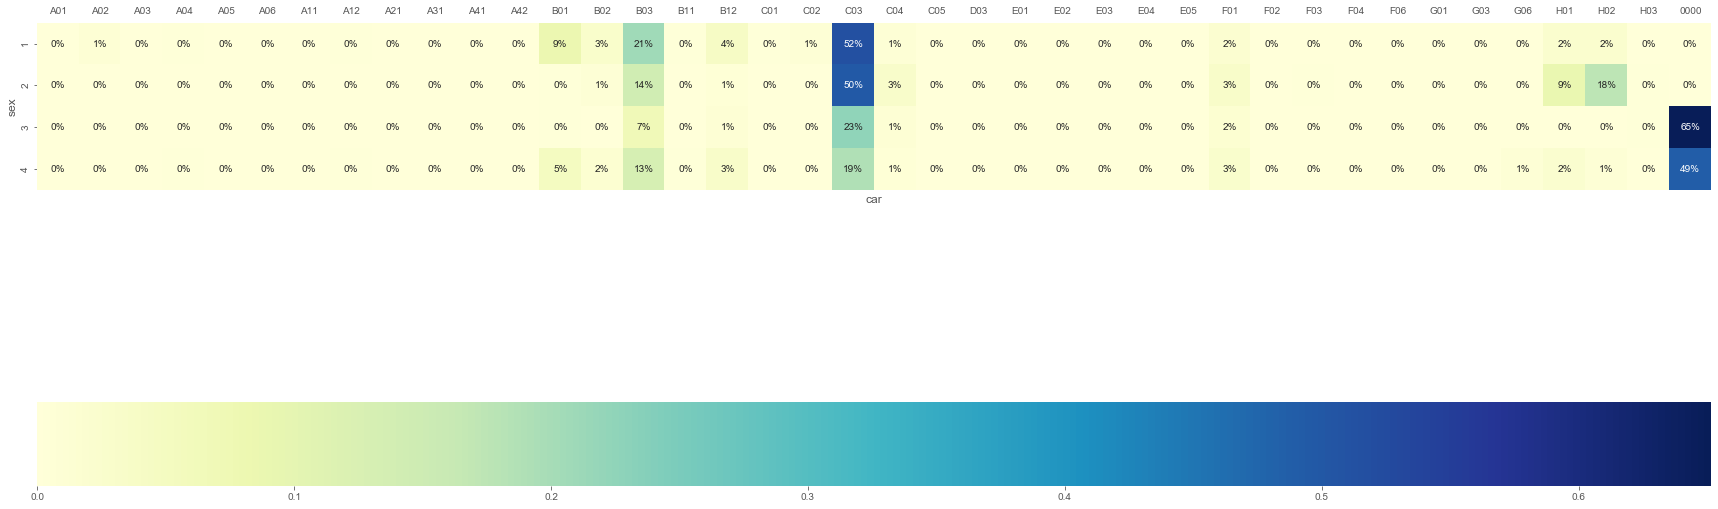

In [104]:
#性別 vs 其他因子
map1=pd.crosstab(df['sex'],df['car'],normalize='index')
plt.figure(figsize=(30,26))  
plt.tick_params(axis='both', which='major',  labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(map1, annot=True,cmap='YlGnBu',fmt='.00%',square=True,cbar_kws={"orientation": "horizontal"})

In [149]:
#年齡 vs 其他因子
range=[0,18,26,40,65,np.inf]
group=['kid','young','grow','mid','old']
df['age_type']=pd.cut(df['age'],bins=range,labels=group)
df['age_type'].fillna('kid',inplace=True)
df2['age_type']=pd.cut(df2['age'],bins=range,labels=group)
df2['age_type'].fillna('kid',inplace=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


<AxesSubplot:xlabel='age_type', ylabel='car'>

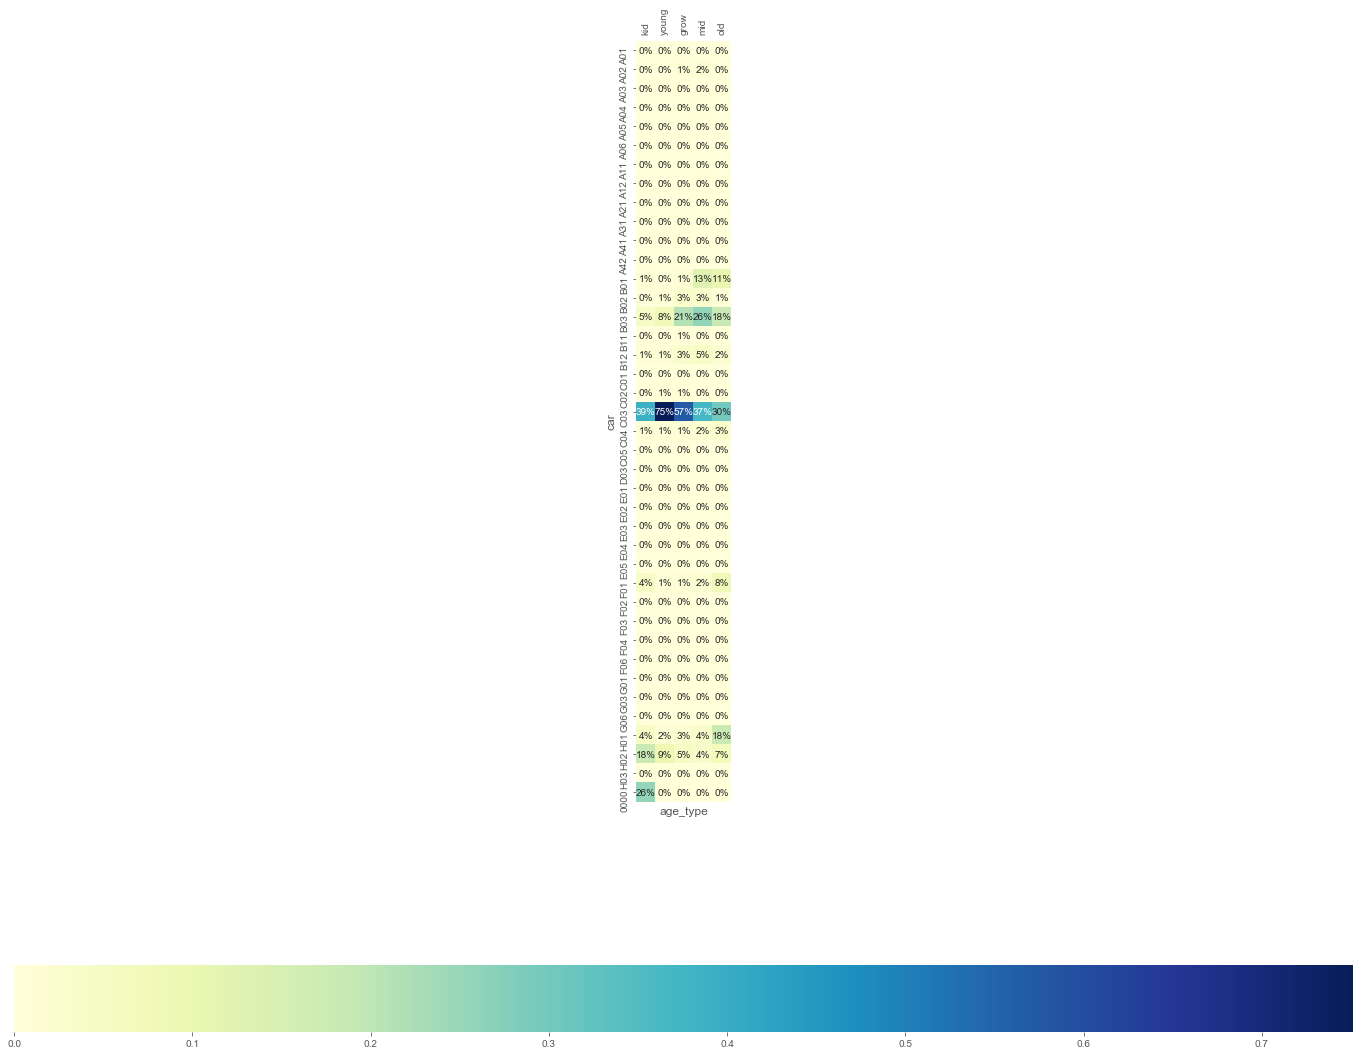

In [152]:
map1=pd.crosstab(df['car'],df['age_type'],normalize='columns')
plt.figure(figsize=(24,20))  
plt.tick_params(axis='both', which='major',  labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(map1, annot=True,cmap='YlGnBu',fmt='.00%',square=True,cbar_kws={"orientation": "horizontal"})

<AxesSubplot:xlabel='age', ylabel='car'>

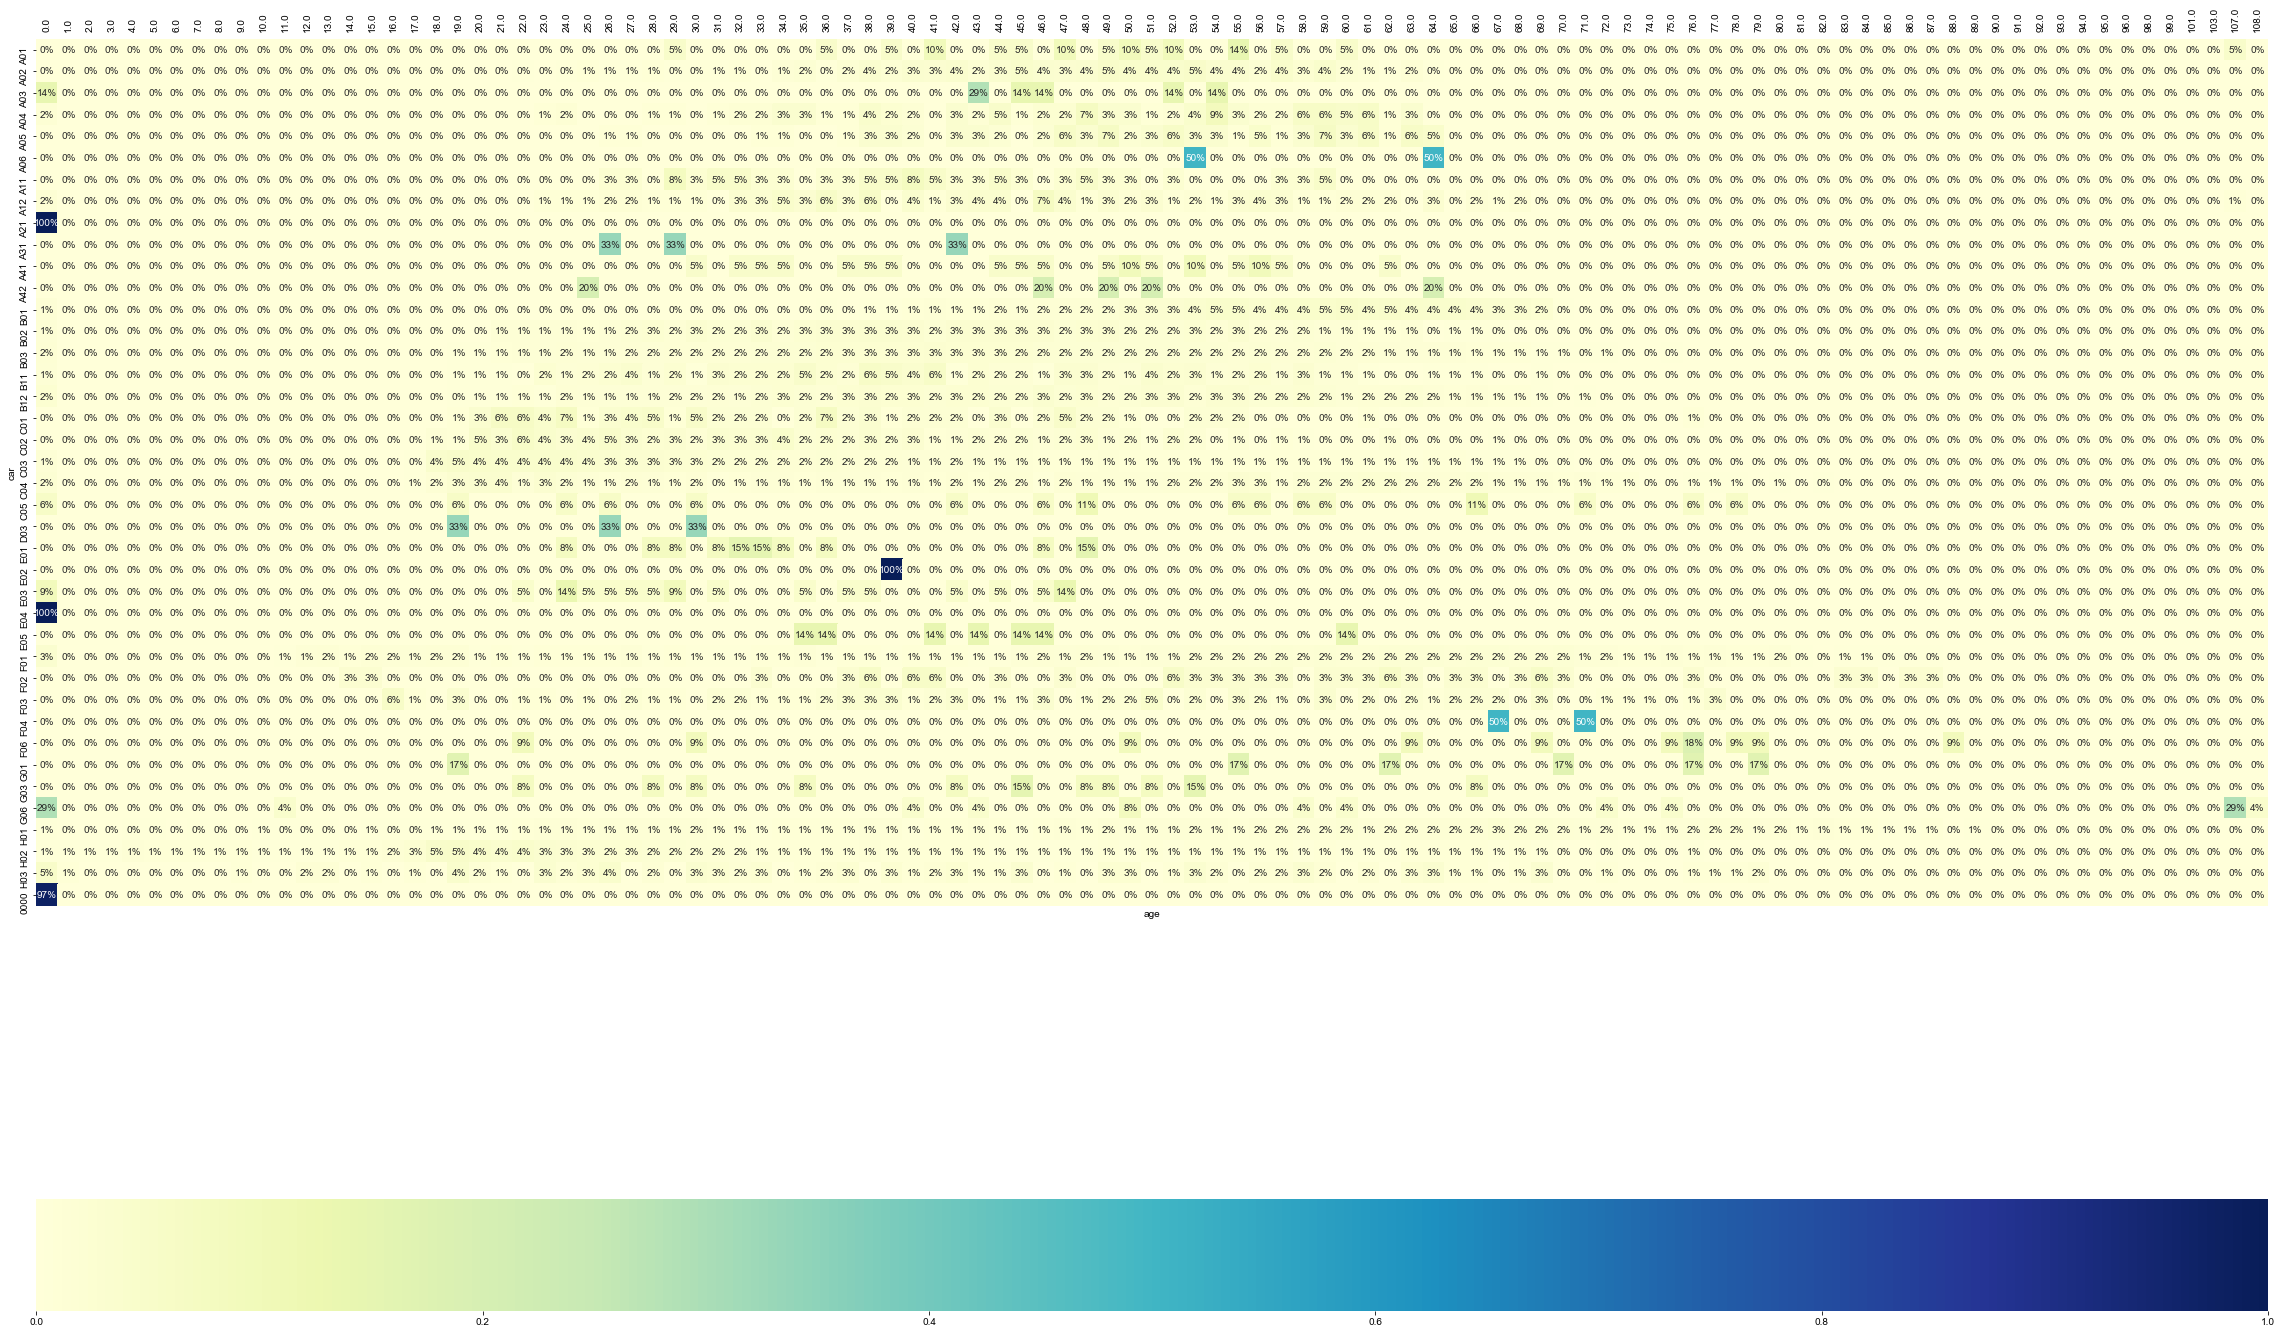

In [88]:
#車 vs 其他因子
map1=pd.crosstab(df['car'],df['age'],normalize='index')
plt.figure(figsize=(40,36))  
plt.tick_params(axis='both', which='major',  labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(map1, annot=True,cmap='YlGnBu',fmt='.00%',square=True,cbar_kws={"orientation": "horizontal"})

<AxesSubplot:xlabel='hour', ylabel='car'>

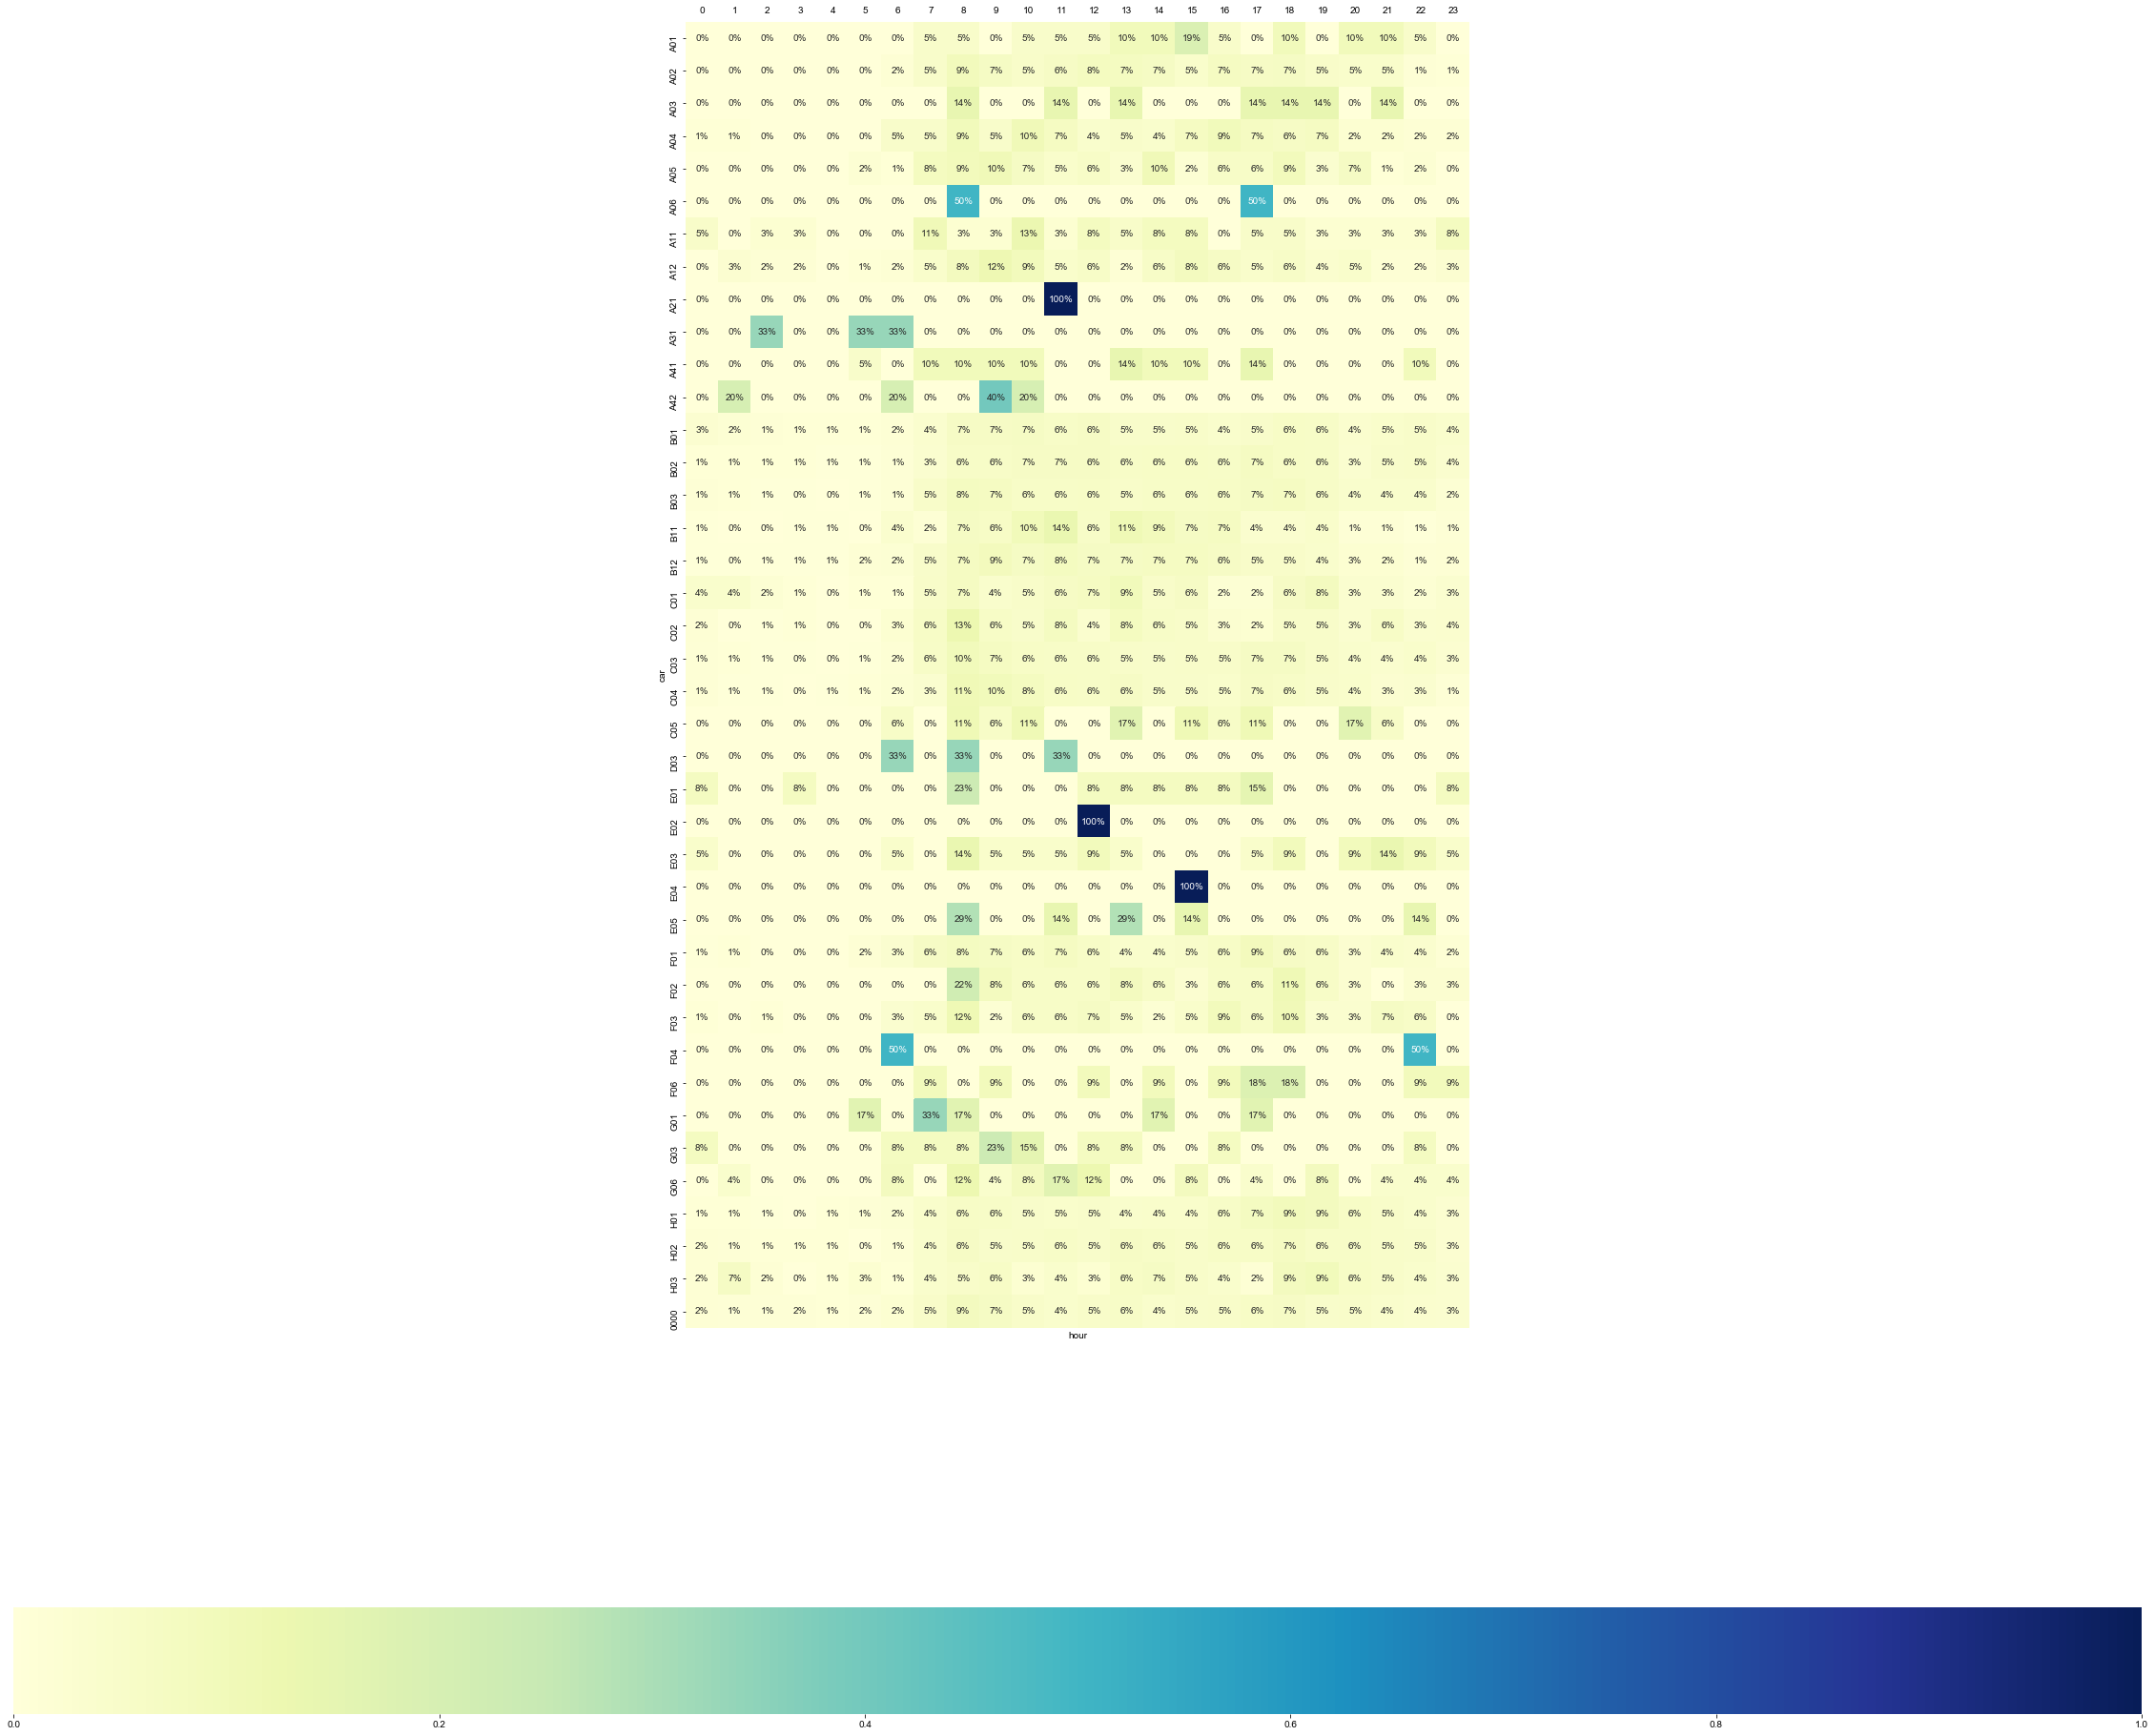

In [108]:
map1=pd.crosstab(df['car'],df['hour'],normalize='index')
plt.figure(figsize=(40,36))  
plt.tick_params(axis='both', which='major',  labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(map1, annot=True,cmap='YlGnBu',fmt='.00%',square=True,cbar_kws={"orientation": "horizontal"})

<AxesSubplot:xlabel='lo_type', ylabel='car'>

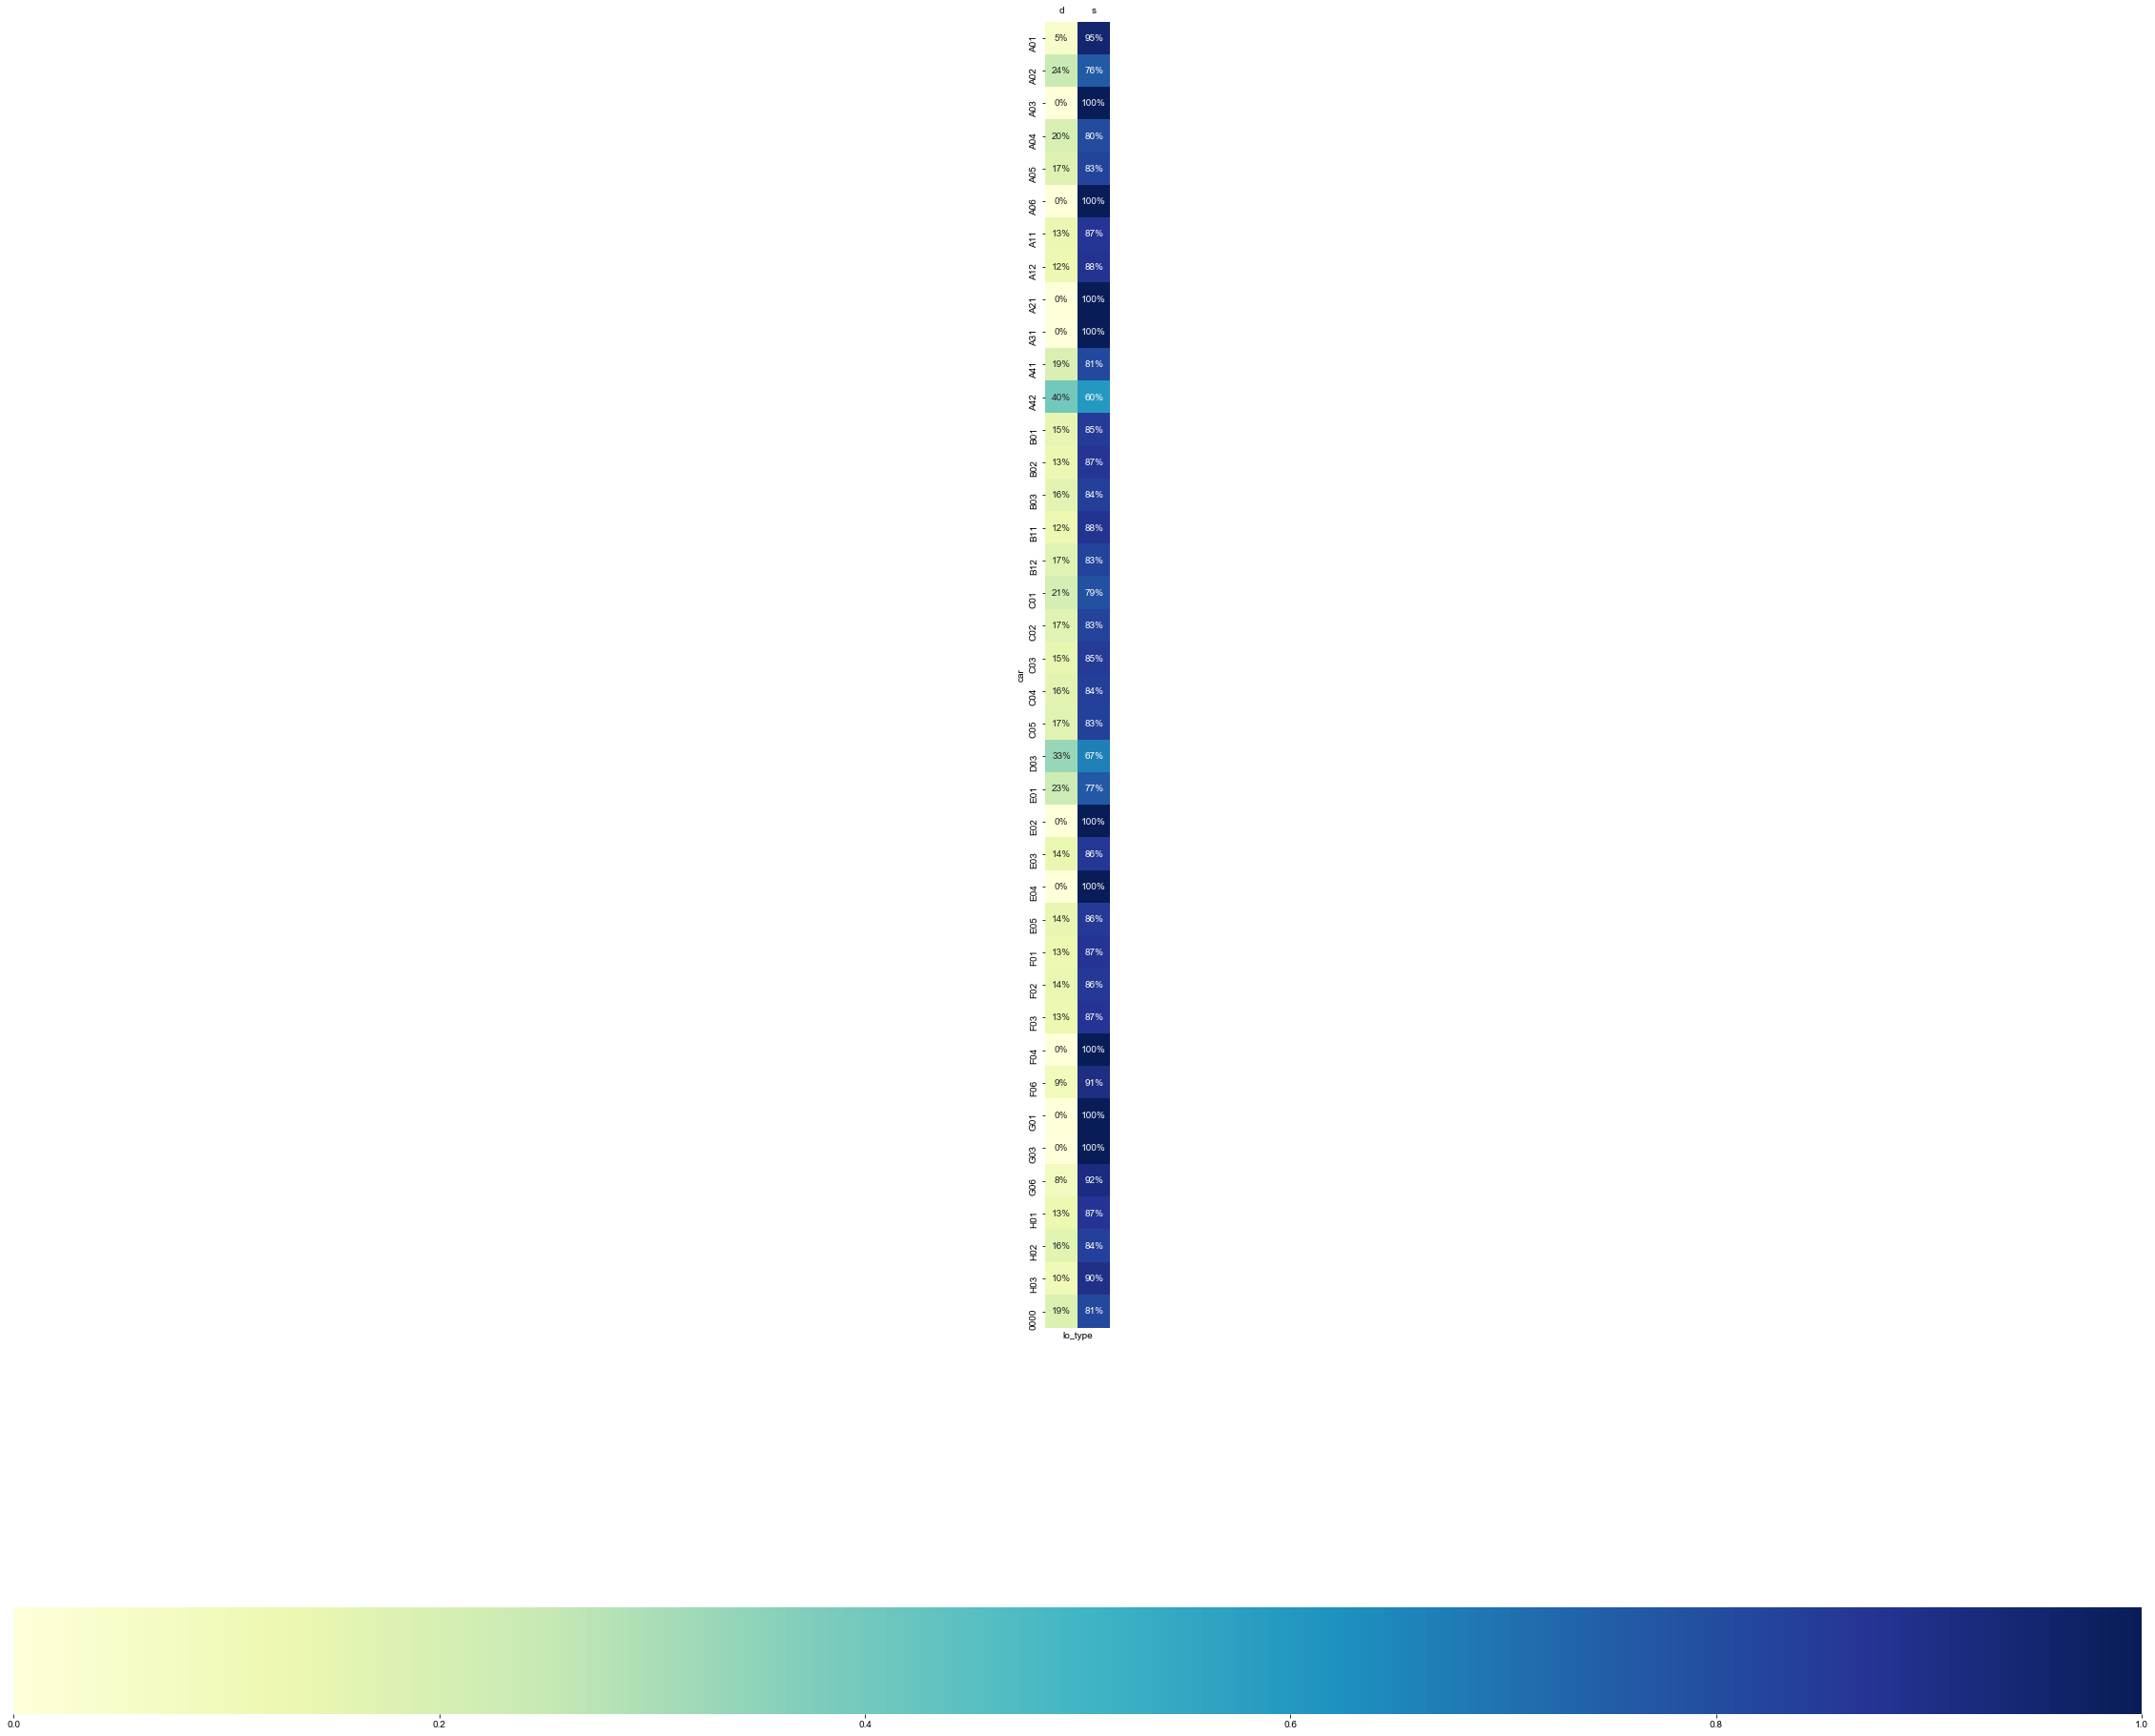

In [109]:
map1=pd.crosstab(df_loca['car'],df_loca['lo_type'],normalize='index')
plt.figure(figsize=(40,36))  
plt.tick_params(axis='both', which='major',  labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(map1, annot=True,cmap='YlGnBu',fmt='.00%',square=True,cbar_kws={"orientation": "horizontal"})

<AxesSubplot:xlabel='spot', ylabel='car'>

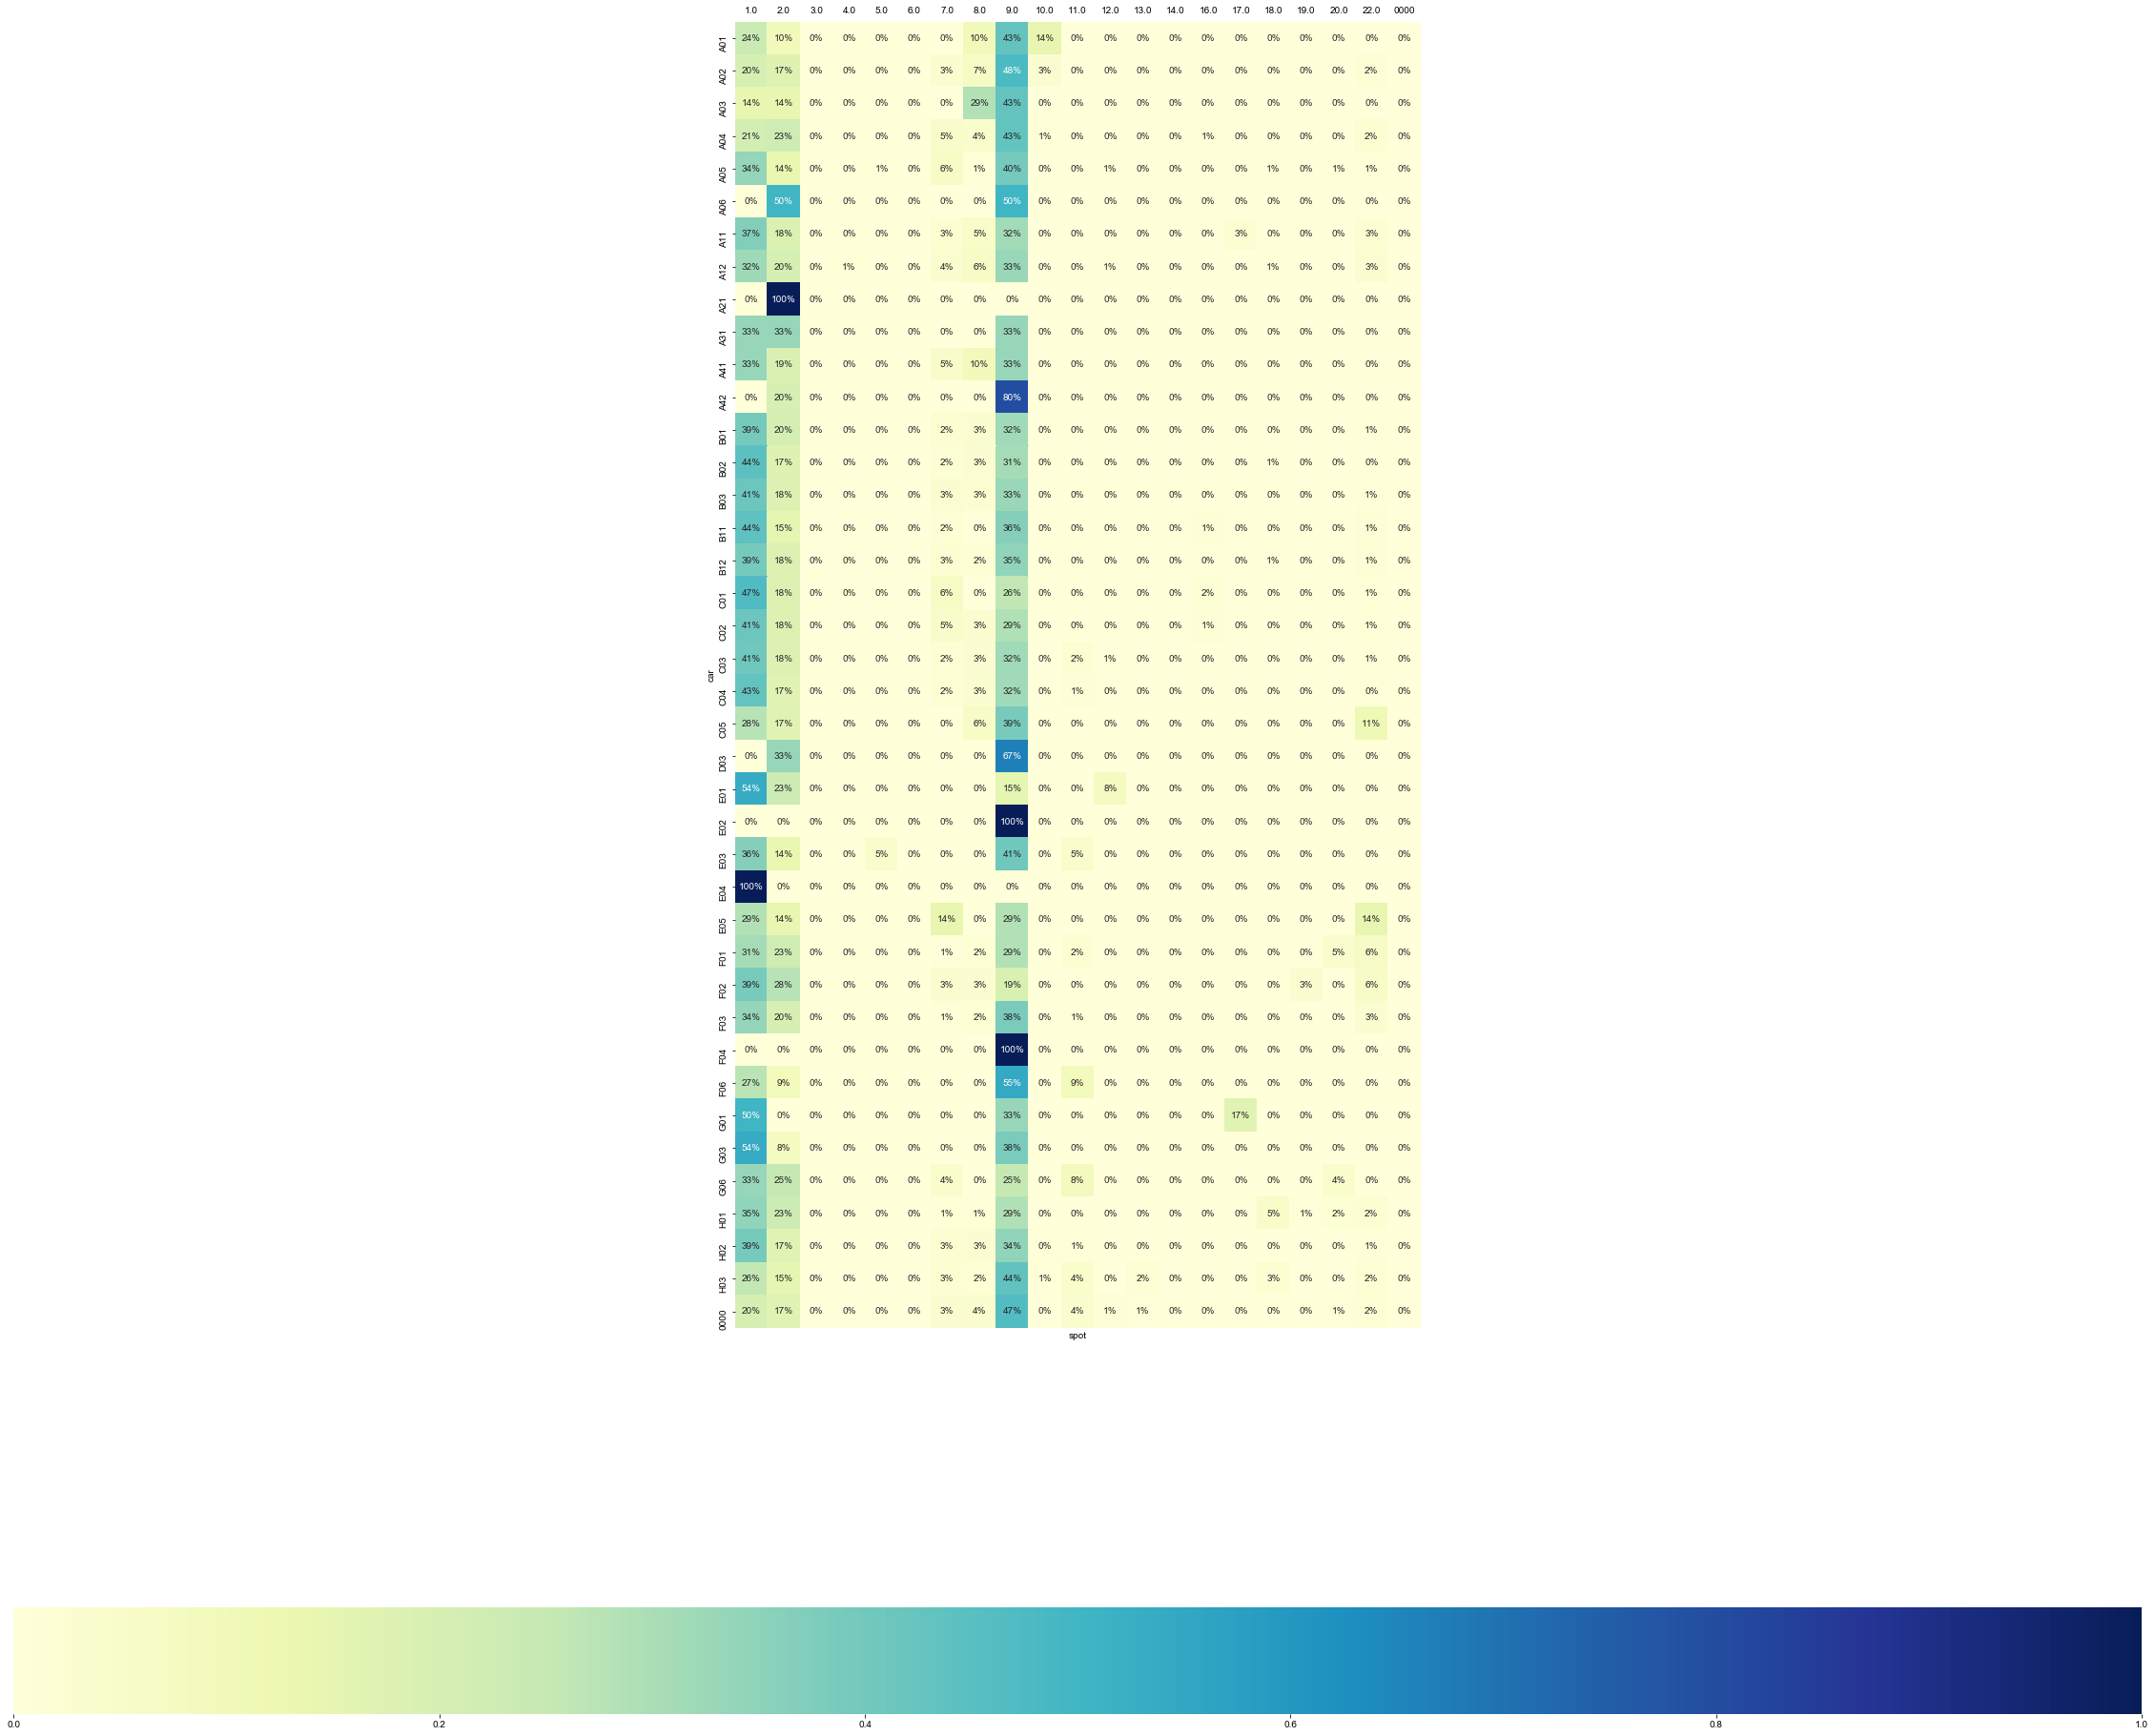

In [110]:
map1=pd.crosstab(df['car'],df['spot'],normalize='index')
plt.figure(figsize=(40,36))  
plt.tick_params(axis='both', which='major',  labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(map1, annot=True,cmap='YlGnBu',fmt='.00%',square=True,cbar_kws={"orientation": "horizontal"})

<AxesSubplot:xlabel='road', ylabel='car'>

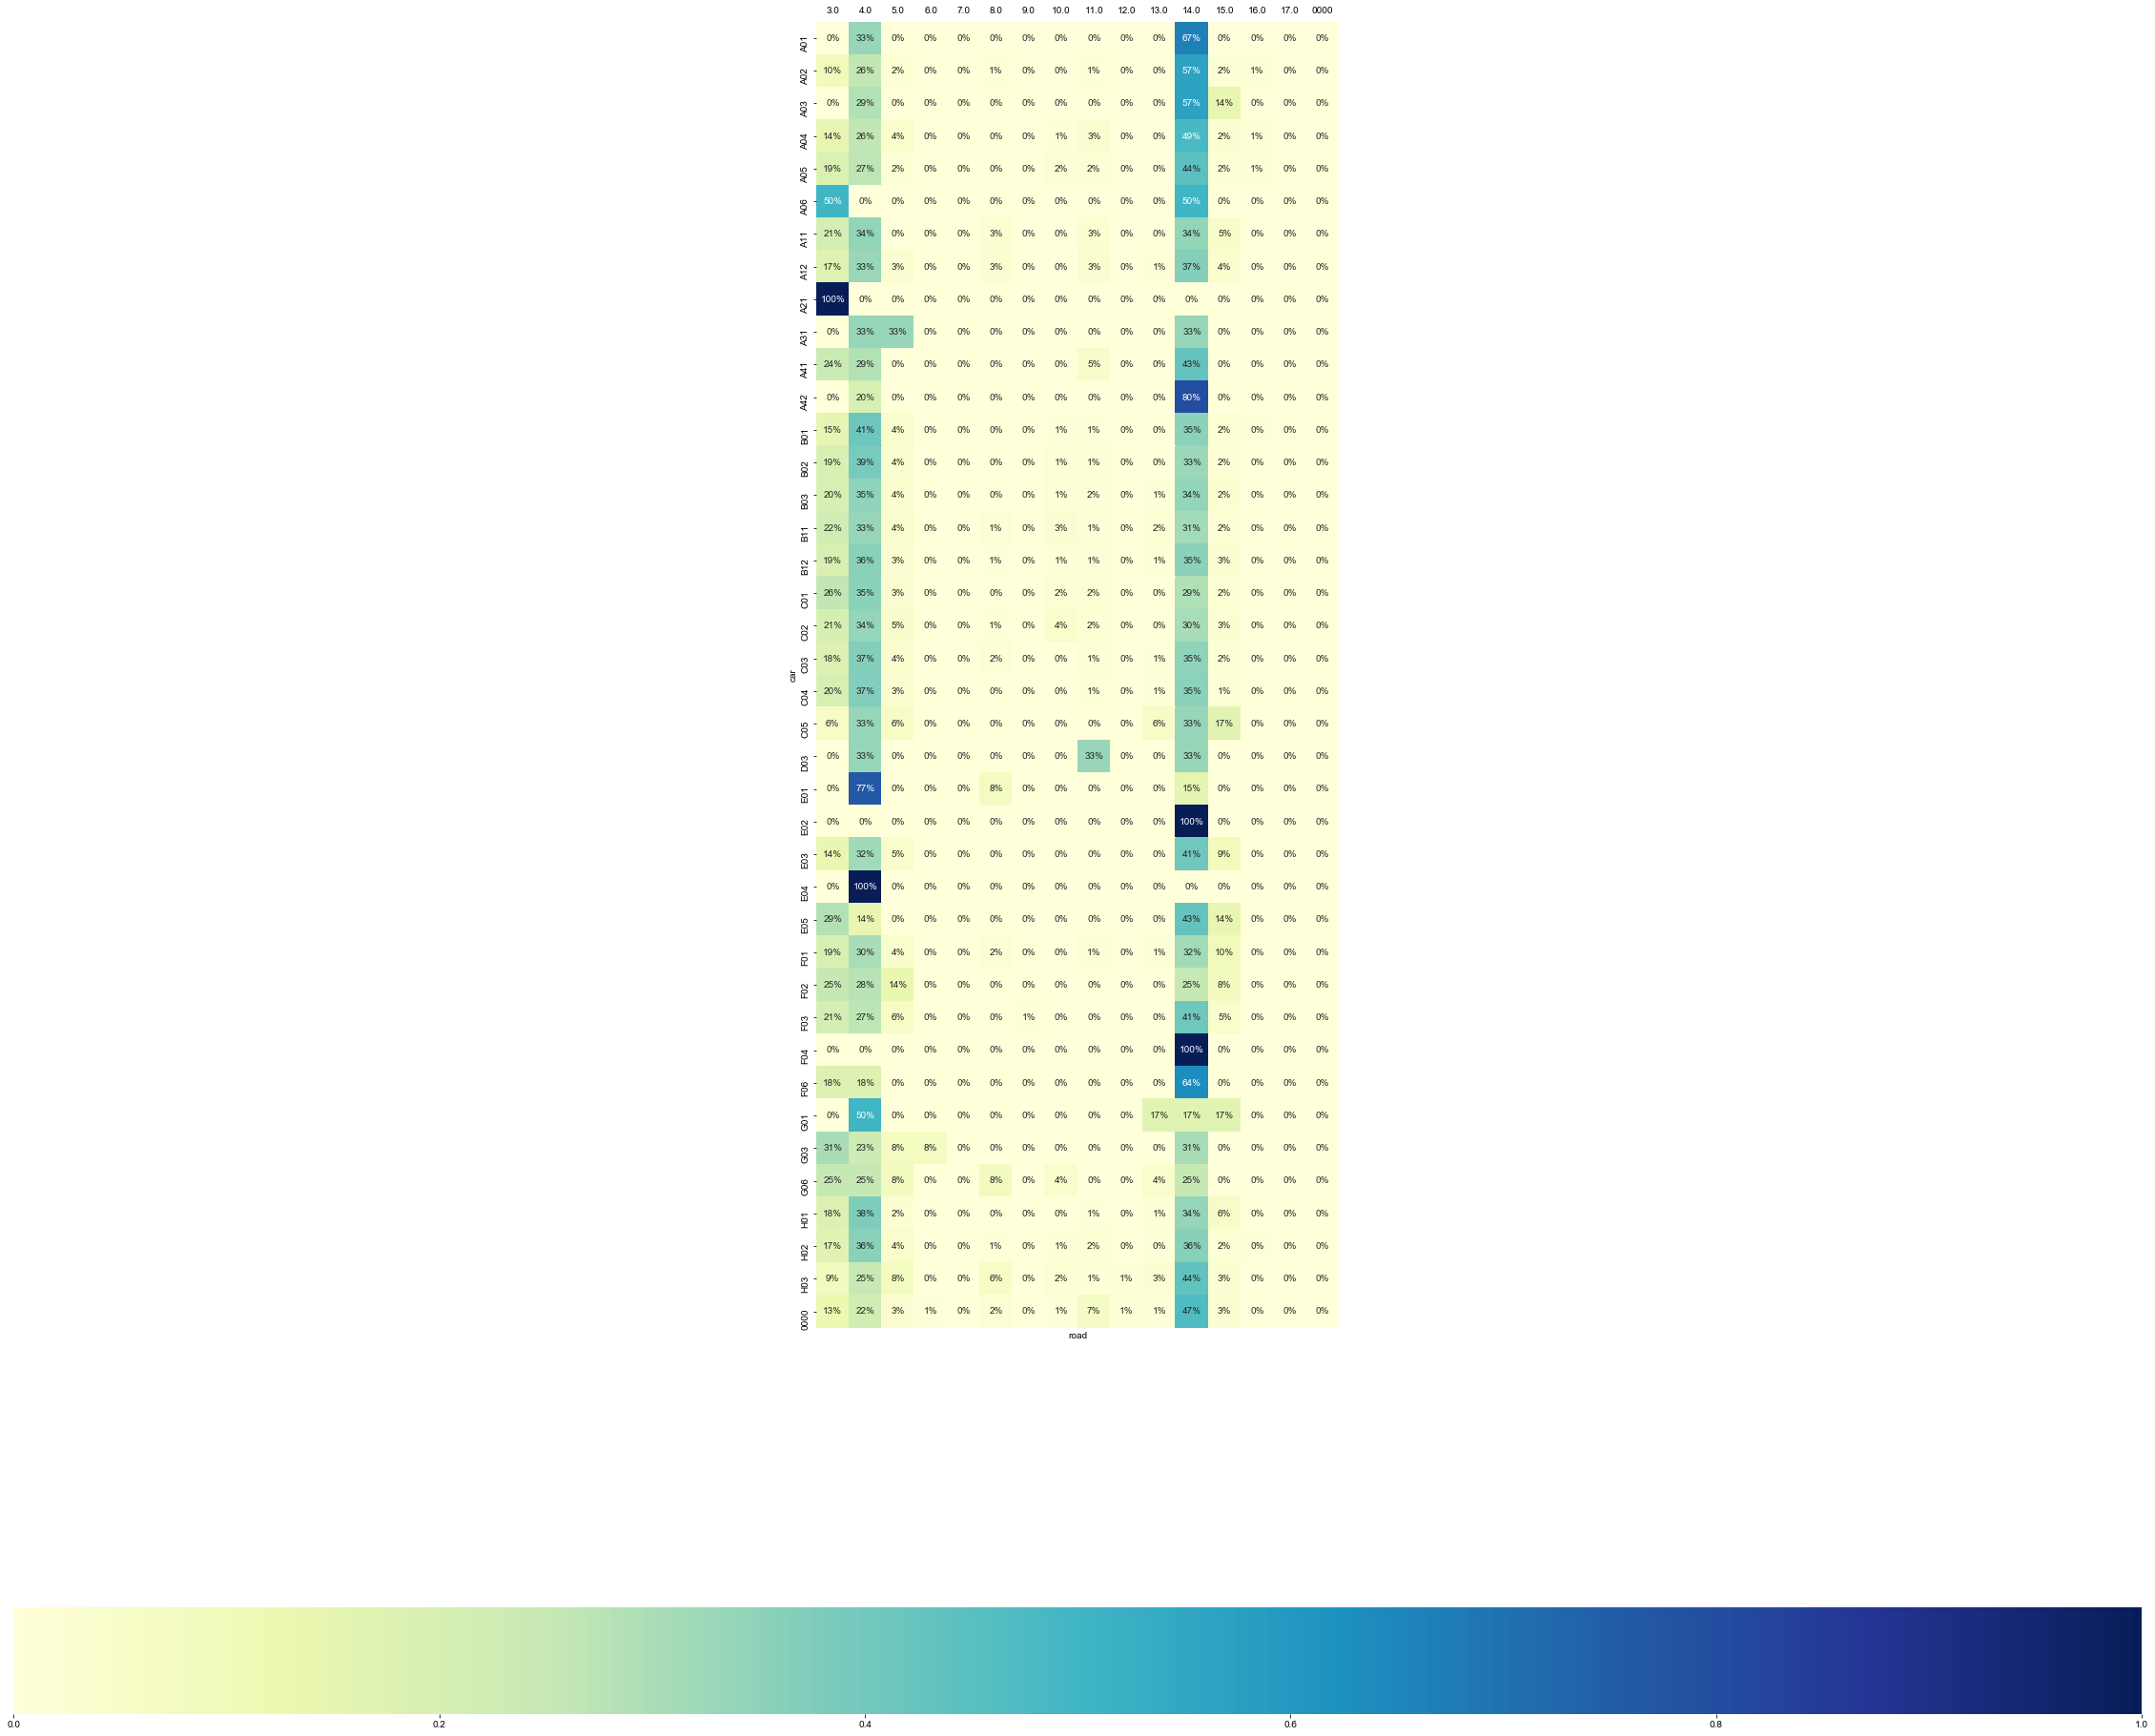

In [111]:
map1=pd.crosstab(df['car'],df['road'],normalize='index')
plt.figure(figsize=(40,36))  
plt.tick_params(axis='both', which='major',  labelbottom = False, bottom=False, top = False, labeltop=True)
sns.heatmap(map1, annot=True,cmap='YlGnBu',fmt='.00%',square=True,cbar_kws={"orientation": "horizontal"})